In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [2]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/asn7yfxccx9hqi4afrnw685xw6c6382z-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [3]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [4]:
# Retrieve the BPCells library path:

# The original BPCells guix profile contains less number of packages than the
# corresponding renv profile hydrated from the original guix profile.
# Therefore, I will use the renv library path.

bpcells_lib <- "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/BPCELLS/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [5]:
.libPaths(new = bpcells_lib, include.site = FALSE)

In [6]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/BPCELLS/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [7]:
library(BPCells)

In [9]:
library(magrittr)

In [10]:
here::here("..", "cell_ranger_alignment_files") %>% list.files()

[1] "atac_fragments.tsv.gz"     "atac_fragments.tsv.gz.tbi"

In [11]:
frags <- open_fragments_10x(here::here("..", "cell_ranger_alignment_files", "atac_fragments.tsv.gz"))

In [12]:
frags

IterableFragments object of class "ShiftFragments"

Cells: count unknown
Chromosomes: count unknown

Queued Operations:
1. Load 10x fragments file from /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/cell_ranger_alignment_files/atac_fragments.tsv.gz
2. Shift start +0bp, end +1bp

In [13]:
frags <- frags %>% write_fragments_dir(here::here('r_objects', 'bpcells_objects', 'zhu_et_al_frags_by_bpcells'))

In [14]:
frags

IterableFragments object of class "FragmentsDir"

Cells: 729872 cells with names CACCGGTAGGAGTCGG-1, GTCCTCCCAGCTAACC-1 ... CTCCGTCCACGCAACT-1
Chromosomes: 39 chromosomes with names chr1, chr10 ... KI270713.1

Queued Operations:
1. Read compressed fragments from directory /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24/r_objects/bpcells_objects/zhu_et_al_frags_by_bpcells

In [17]:
# my genome is hg38. I will copy the references folder previously downloaded
# using BPCells in another project and use it.

In [18]:
genes_info <- read_gencode_transcripts(
  here::here('r_objects', 'bpcells_objects', 'references'), 
  release="42", 
  transcript_choice="MANE_Select",
  annotation_set = "basic", 
  features="transcript" # Make sure to set this so we don't get exons as well
)
head(genes_info)

chr  source feature    start  end    score strand frame gene_id           
1 chr1 HAVANA transcript  65418  71585 .     +      .     ENSG00000186092.7 
2 chr1 HAVANA transcript 450739 451678 .     -      .     ENSG00000284733.2 
3 chr1 HAVANA transcript 685715 686654 .     -      .     ENSG00000284662.2 
4 chr1 HAVANA transcript 923922 944574 .     +      .     ENSG00000187634.13
5 chr1 HAVANA transcript 944202 959256 .     -      .     ENSG00000188976.11
6 chr1 HAVANA transcript 960583 965719 .     +      .     ENSG00000187961.15
  gene_type      gene_name transcript_id     MANE_Select
1 protein_coding OR4F5     ENST00000641515.2 TRUE       
2 protein_coding OR4F29    ENST00000426406.4 TRUE       
3 protein_coding OR4F16    ENST00000332831.5 TRUE       
4 protein_coding SAMD11    ENST00000616016.5 TRUE       
5 protein_coding NOC2L     ENST00000327044.7 TRUE       
6 protein_coding KLHL17    ENST00000338591.8 TRUE

In [19]:
blacklist <- read_encode_blacklist("./references", genome="hg38")
head(blacklist)

chr   start    end      reason            
1 chr10        0    45700 Low Mappability   
2 chr10 38481300 38596500 High Signal Region
3 chr10 38782600 38967900 High Signal Region
4 chr10 39901300 41712900 High Signal Region
5 chr10 41838900 42107300 High Signal Region
6 chr10 42279400 42322500 High Signal Region

In [20]:
chrom_sizes <- read_ucsc_chrom_sizes("./references", genome="hg38")
head(chrom_sizes)

chr  start end      
1 chr1 0     248956422
2 chr2 0     242193529
3 chr3 0     198295559
4 chr4 0     190214555
5 chr5 0     181538259
6 chr6 0     170805979

In [22]:
atac_qc_all <- qc_scATAC(frags, genes_info, blacklist)
head(atac_qc_all)

cellName           TSSEnrichment nFrags subNucleosomal
CACCGGTAGGAGTCGG-1 CACCGGTAGGAGTCGG-1 15.841584      14312  5256         
GTCCTCCCAGCTAACC-1 GTCCTCCCAGCTAACC-1 37.722772       9306  4386         
AGACTATGTAACCACA-1 AGACTATGTAACCACA-1  4.455446       1904   855         
TGCTCAACAGTAAAGC-1 TGCTCAACAGTAAAGC-1 12.326733      28388 15143         
AGCAAGGGTGCTAGCG-1 AGCAAGGGTGCTAGCG-1 27.877073      45892 20326         
GGACAGCCATTAGGTT-1 GGACAGCCATTAGGTT-1  9.631965     109704 51546         
                   monoNucleosomal multiNucleosomal ReadsInTSS ReadsFlankingTSS
CACCGGTAGGAGTCGG-1  6302            2754             616        77             
GTCCTCCCAGCTAACC-1  3313            1607            1143        60             
AGACTATGTAACCACA-1   665             384              45         6             
TGCTCAACAGTAAAGC-1  8500            4745            1245       200             
AGCAAGGGTGCTAGCG-1 16785            8781            3252       231             
GGACAGCCATTAGGTT-1 37554           20604            2184       449             
                   ReadsInPromoter ReadsInBlacklist
CACCGGTAGGAGTCGG-1  3268            176            
GTCCTCCCAGCTAACC-1  5475             97            
AGACTATGTAACCACA-1   329             18            
TGCTCAACAGTAAAGC-1  7719            219            
AGCAAGGGTGCTAGCG-1 16440            430            
GGACAGCCATTAGGTT-1 14334           1756

In [23]:
atac_qc_all %>% saveRDS(here::here('r_objects', 'atac_qc_all_from_bpcells.RDS'))

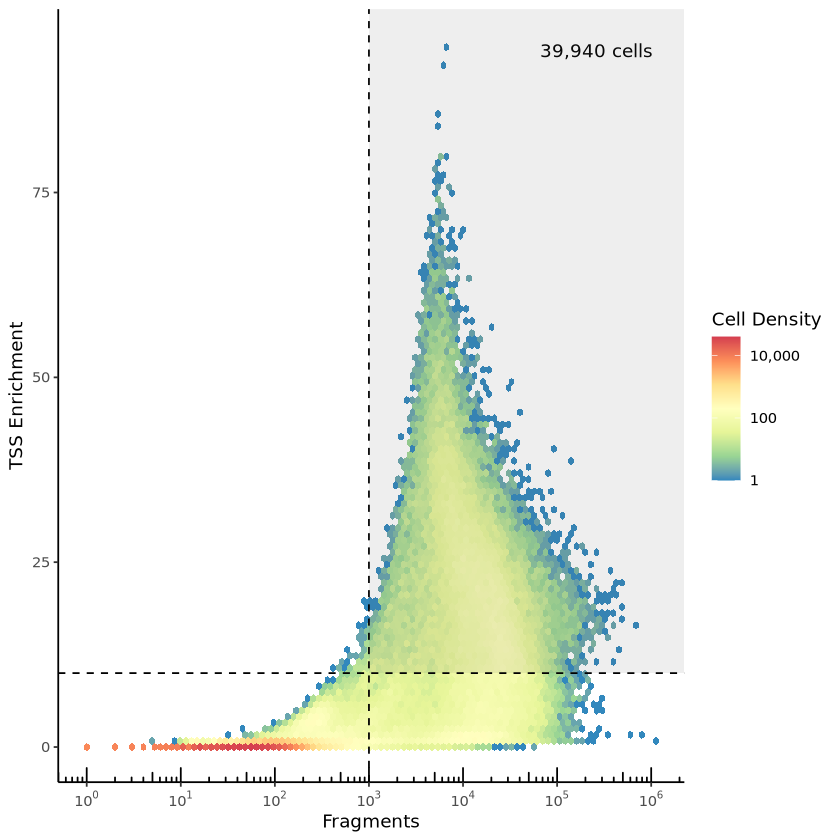

In [27]:
plot_tss_scatter(atac_qc_all, min_frags=1000, min_tss=10)

In [38]:
p1 <- plot_fragment_length(frags)

In [39]:
p2 <- plot_tss_profile(frags, genes_info)

In [40]:
library(patchwork)

In [41]:
options(repr.plot.width = 15, repr.plot.height = 7)

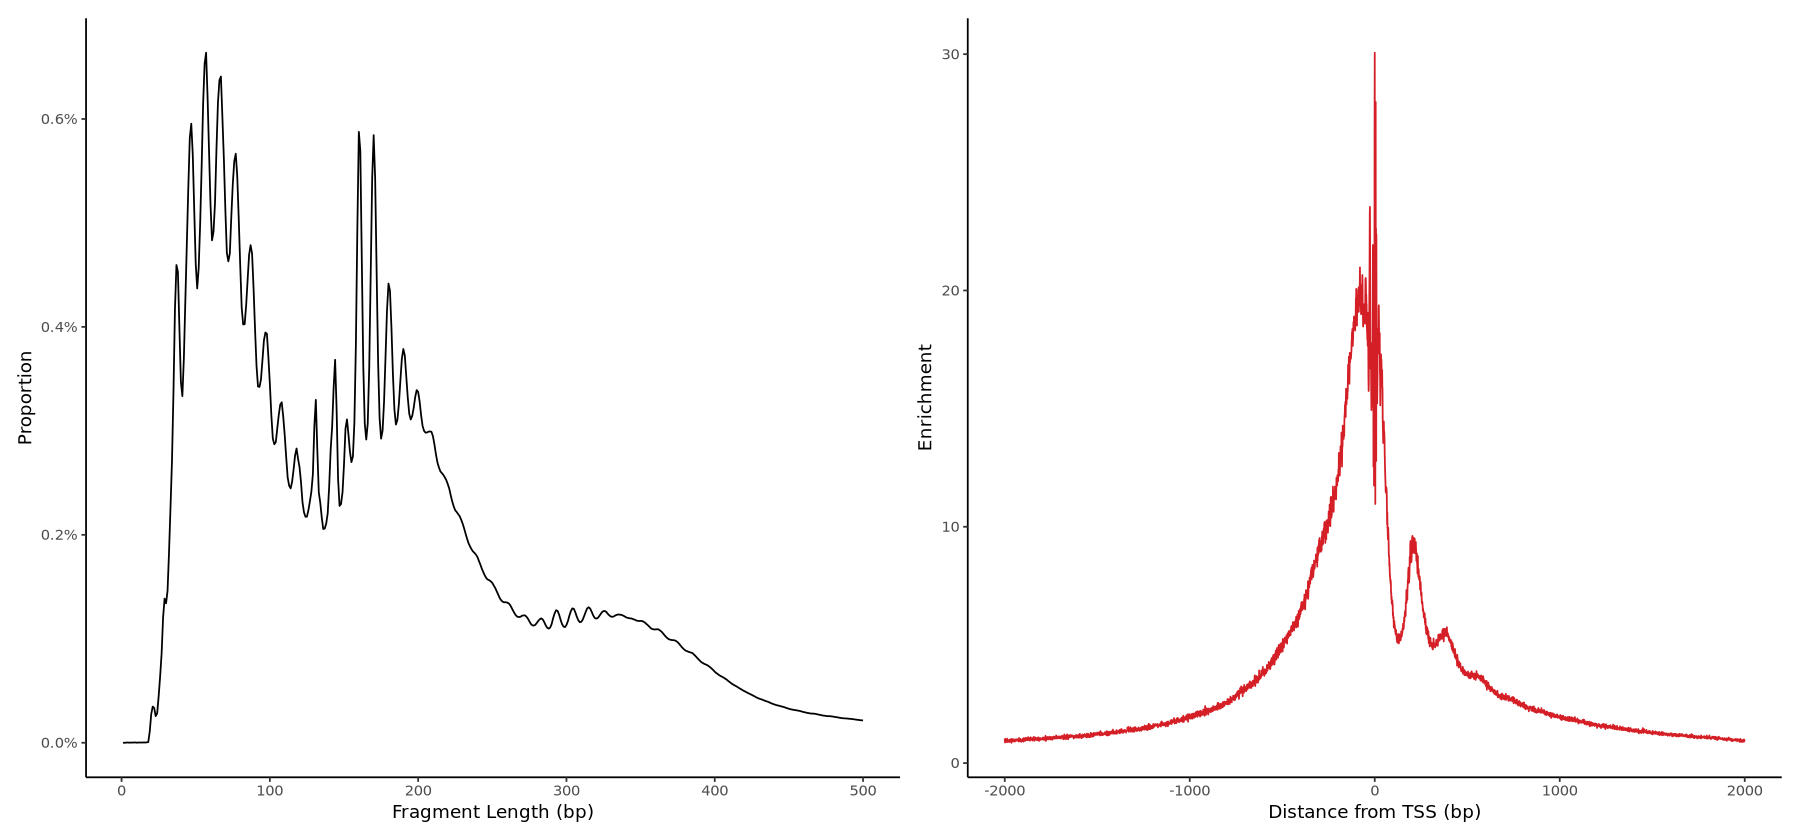

In [42]:
p1 + p2

In [43]:
# I will create a subsetted fragment object for the cells used in
# eGRN network.

In [44]:
here::here('r_objects') %>% list.files() %>% print()

 [1] "DE_data_sig_EC.RDS"                          
 [2] "EC_detected_peaks_min1.RDS"                  
 [3] "EC_detected_peaks_min5.RDS"                  
 [4] "EC_eGRN_min1_Zhu_et_al_Pando_obj.RDS"        
 [5] "EC_eGRN_regions_min1_Granges.RDS"            
 [6] "EC_eGRN_regions_min5_Granges.RDS"            
 [7] "Zhu_et_al_Pando_w_eGRNs_SLURM_c1.RDS"        
 [8] "Zhu_et_al_Pando_w_eGRNs_SLURM_c2.RDS"        
 [9] "Zhu_et_al_Pando_w_eGRNs_SLURM_c3.RDS"        
[10] "Zhu_et_al_Pando_w_eGRNs_SLURM_c4.RDS"        
[11] "Zhu_et_al_Pando_w_eGRNs_SLURM_c5.RDS"        
[12] "Zhu_et_al_Pando_w_eGRNs_SLURM_c6.RDS"        
[13] "Zhu_et_al_Pando_w_motifs.RDS"                
[14] "Zhu_et_al_eGRNs_combined.RDS"                
[15] "Zhu_et_al_w_JOINT_PANDO_eGRNs_p_adjusted.RDS"
[16] "atac_qc_all_from_bpcells.RDS"                
[17] "bpcells_objects"                             
[18] "coef_DF_combined.RDS"                        
[19] "counts_ATAC_mat_for_BPCells.RDS"             
[20] "counts

In [45]:
counts_ATAC_mat <- 
    readRDS(here::here('r_objects', 'counts_ATAC_mat_for_BPCells.RDS'))

In [46]:
counts_ATAC_mat %>% head()

  [[ suppressing 34 column names '4_AAACAGCCAACACTTG-1', '4_AAACAGCCACCAAAGG-1', '4_AAACAGCCATAAGTTC-1' ... ]]



6 x 45549 sparse Matrix of class "dgCMatrix"
                                                                              
chr1-10063-10327   . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . 1
chr1-180726-180979 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
chr1-181323-181566 . . 1 . . . . . . 1 . . . . . . . . . . . . . . . . . . . .
chr1-190727-191632 . . . . . . . . . . . . . . . . . . 1 . . . . . . . 1 . . .
chr1-777615-779293 . . . . 1 1 2 . . 1 . . 1 2 . 1 . 1 . . . 1 . . 1 . . . . .
chr1-779602-779948 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                 
chr1-10063-10327   . . . . ......
chr1-180726-180979 . . . . ......
chr1-181323-181566 . . . . ......
chr1-190727-191632 . . . . ......
chr1-777615-779293 . . . . ......
chr1-779602-779948 . . . . ......

 .....suppressing 45515 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [48]:
frags %>% cellNames() %>% head()

[1] "CACCGGTAGGAGTCGG-1" "GTCCTCCCAGCTAACC-1" "AGACTATGTAACCACA-1"
[4] "TGCTCAACAGTAAAGC-1" "AGCAAGGGTGCTAGCG-1" "GGACAGCCATTAGGTT-1"

In [49]:
frags

IterableFragments object of class "FragmentsDir"

Cells: 729872 cells with names CACCGGTAGGAGTCGG-1, GTCCTCCCAGCTAACC-1 ... CTCCGTCCACGCAACT-1
Chromosomes: 39 chromosomes with names chr1, chr10 ... KI270713.1

Queued Operations:
1. Read compressed fragments from directory /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24/r_objects/bpcells_objects/zhu_et_al_frags_by_bpcells

In [50]:
frags %>% cellNames() %>% duplicated() %>% table()

.
 FALSE 
729872 

In [52]:
# check the unique suffixes_

frags %>% 
cellNames() %>% 
stringr::str_split_i(pattern = '-', i = 2) %>% 
unique()

[1] "1"

In [53]:
# I will also load metedata to understand cell barcode naming formats:

metadata <- readRDS(here::here('r_objects', 'metadata_DF_forBPCells.RDS'))

In [56]:
metadata %>% colnames() %>% print()

 [1] "orig.ident"                              
 [2] "nCount_RNA"                              
 [3] "nFeature_RNA"                            
 [4] "author_cell_type"                        
 [5] "age_group"                               
 [6] "donor_id"                                
 [7] "author_TSS_percentile_from_ATAC"         
 [8] "author_nucleosome_signal_from_ATAC"      
 [9] "assay_ontology_term_id"                  
[10] "cell_type_ontology_term_id"              
[11] "development_stage_ontology_term_id"      
[12] "disease_ontology_term_id"                
[13] "self_reported_ethnicity_ontology_term_id"
[14] "organism_ontology_term_id"               
[15] "sex_ontology_term_id"                    
[16] "tissue_ontology_term_id"                 
[17] "suspension_type"                         
[18] "is_primary_data"                         
[19] "batch"                                   
[20] "tissue_type"                             
[21] "cell_type"                        

In [57]:
metadata %>% head() %>% print()

                     orig.ident nCount_RNA nFeature_RNA author_cell_type
4_AAACAGCCAACACTTG-1          4       3699         1685    EN-fetal-late
4_AAACAGCCACCAAAGG-1          4       4417         2149    EN-fetal-late
4_AAACAGCCATAAGTTC-1          4       4489         2469    EN-fetal-late
4_AAACATGCATAGTCAT-1          4       4739         2620    EN-fetal-late
4_AAACATGCATTGTCAG-1          4       4669         2595    EN-fetal-late
4_AAACATGCATTGTGAT-1          4       4845         2931    EN-fetal-late
                      age_group donor_id author_TSS_percentile_from_ATAC
4_AAACAGCCAACACTTG-1 late fetal   LaFet1                            0.31
4_AAACAGCCACCAAAGG-1 late fetal   LaFet1                            0.72
4_AAACAGCCATAAGTTC-1 late fetal   LaFet1                            0.51
4_AAACATGCATAGTCAT-1 late fetal   LaFet1                            0.47
4_AAACATGCATTGTCAG-1 late fetal   LaFet1                            0.48
4_AAACATGCATTGTGAT-1 late fetal   LaFet1           

In [58]:
metadata$orig.ident %>% table()

.
    11 150656 150666     16      4   4413   4422   5936   5977   6007   6032 
  3679   5855   1541   2801   3102   2723   3683   5112   3693   3188   5418 
     8 
  4754 

In [60]:
metadata %>% 
rownames %>% 
stringr::str_split_i(pattern = '_', i = 1) %>% 
unique()

[1] "4"      "8"      "11"     "16"     "4413"   "4422"   "5936"   "5977"  
 [9] "6007"   "6032"   "150656" "150666"

In [61]:
metadata %>% 
rownames %>% 
stringr::str_split_i(pattern = '_', i = 2) %>% 
duplicated() %>% 
table()

.
FALSE  TRUE 
44222  1327 

In [62]:
# there are some cell names with identical barcodes but different
# original identities, either library, batch or experimen related 
# signature.

In [63]:
frags

IterableFragments object of class "FragmentsDir"

Cells: 729872 cells with names CACCGGTAGGAGTCGG-1, GTCCTCCCAGCTAACC-1 ... CTCCGTCCACGCAACT-1
Chromosomes: 39 chromosomes with names chr1, chr10 ... KI270713.1

Queued Operations:
1. Read compressed fragments from directory /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24/r_objects/bpcells_objects/zhu_et_al_frags_by_bpcells

In [70]:
cellNames(frags) %>% head()

[1] "CACCGGTAGGAGTCGG-1" "GTCCTCCCAGCTAACC-1" "AGACTATGTAACCACA-1"
[4] "TGCTCAACAGTAAAGC-1" "AGCAAGGGTGCTAGCG-1" "GGACAGCCATTAGGTT-1"

In [71]:
rownames(metadata) %>% head()

[1] "4_AAACAGCCAACACTTG-1" "4_AAACAGCCACCAAAGG-1" "4_AAACAGCCATAAGTTC-1"
[4] "4_AAACATGCATAGTCAT-1" "4_AAACATGCATTGTCAG-1" "4_AAACATGCATTGTGAT-1"

In [72]:
# I will find the cell barcodes that match the metadata rownames:

metadata_cellnames <- 
rownames(metadata) %>% 
stringr::str_split_i(pattern = '_', i = 2)

In [73]:
metadata_cellnames %>% head()

[1] "AAACAGCCAACACTTG-1" "AAACAGCCACCAAAGG-1" "AAACAGCCATAAGTTC-1"
[4] "AAACATGCATAGTCAT-1" "AAACATGCATTGTCAG-1" "AAACATGCATTGTGAT-1"

In [74]:
table(metadata_cellnames %in% cellNames(frags))


 TRUE 
45549 

In [75]:
metadata_cellnames %>% length()

[1] 45549

In [76]:
metadata_cellnames %>% duplicated() %>% table()

.
FALSE  TRUE 
44222  1327 

In [79]:
metadata_cellnames %>% duplicated() %>% metadata[.,] %>% rownames() %>% .[1]

[1] "8_AAGCTAGAGCTTTGTT-1"

In [82]:
rownames(metadata) %>% grep(pattern = 'AAGCTAGAGCTTTGTT-1', value = T)

[1] "4_AAGCTAGAGCTTTGTT-1"    "8_AAGCTAGAGCTTTGTT-1"   
[3] "4413_AAGCTAGAGCTTTGTT-1"

In [83]:
cellNames(frags) %>% grep(pattern = 'AAGCTAGAGCTTTGTT-1', value = T)

[1] "AAGCTAGAGCTTTGTT-1"

In [84]:
rownames(metadata) %>% grep(pattern = 'AAGCTAGAGCTTTGTT-1', value = T) %>% dput()

c("4_AAGCTAGAGCTTTGTT-1", "8_AAGCTAGAGCTTTGTT-1", "4413_AAGCTAGAGCTTTGTT-1"
)


In [85]:
metadata[c("4_AAGCTAGAGCTTTGTT-1", "8_AAGCTAGAGCTTTGTT-1", "4413_AAGCTAGAGCTTTGTT-1"),]

orig.ident nCount_RNA nFeature_RNA author_cell_type
4_AAGCTAGAGCTTTGTT-1    4          4715       2813         IN-fetal        
8_AAGCTAGAGCTTTGTT-1    8          4779       2801         EN-fetal-late   
4413_AAGCTAGAGCTTTGTT-1 4413       4530       2582         EN              
                        age_group  donor_id author_TSS_percentile_from_ATAC
4_AAGCTAGAGCTTTGTT-1    late fetal LaFet1   0.86                           
8_AAGCTAGAGCTTTGTT-1    late fetal LaFet2   0.25                           
4413_AAGCTAGAGCTTTGTT-1 infancy    Inf1     0.13                           
                        author_nucleosome_signal_from_ATAC
4_AAGCTAGAGCTTTGTT-1    1.250862                          
8_AAGCTAGAGCTTTGTT-1    0.884842                          
4413_AAGCTAGAGCTTTGTT-1 1.097078                          
                        assay_ontology_term_id cell_type_ontology_term_id ...
4_AAGCTAGAGCTTTGTT-1    EFO:0030059            CL:0000498                 ...
8_AAGCTAGAGCTTTGTT-1    EFO:0030059            CL:0000679                 ...
4413_AAGCTAGAGCTTTGTT-1 EFO:0030059            CL:0000679                 ...
                        author_JOINTwnnumap_2 modality percent.mt nCount_SCT
4_AAGCTAGAGCTTTGTT-1    -5.482547             RNA_SEQ  0.02120891 4618      
8_AAGCTAGAGCTTTGTT-1    -7.943437             RNA_SEQ  0.00000000 4654      
4413_AAGCTAGAGCTTTGTT-1 -6.345148             RNA_SEQ  0.97130243 4211      
                        nFeature_SCT SCT_snn_res.0.2 seurat_clusters SCT.weight
4_AAGCTAGAGCTTTGTT-1    2813         8               0               0.7177710 
8_AAGCTAGAGCTTTGTT-1    2801         0               0               0.3295096 
4413_AAGCTAGAGCTTTGTT-1 2582         4               12              0.7644074 
                        peaks.weight wsnn_res.0.2
4_AAGCTAGAGCTTTGTT-1    0.2822290    0           
8_AAGCTAGAGCTTTGTT-1    0.6704904    0           
4413_AAGCTAGAGCTTTGTT-1 0.2355926    12

In [86]:
# check duplicated barcodes orig.identities:

duplicated_barcodes <- metadata_cellnames %>% duplicated() %>% metadata_cellnames[.] %>% unique()

In [87]:
duplicated_barcodes %>% length()

[1] 1294

In [88]:
metadata_cellnames %in% duplicated_barcodes %>% table() 

.
FALSE  TRUE 
42928  2621 

In [89]:
metadata_cellnames %in% duplicated_barcodes %>% metadata[.,] %>% dim()

[1] 2621   42

In [95]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
metadata[.,] %>% 
dplyr::count(orig.ident)

orig.ident n  
1  11         197
2  150656     322
3  150666     102
4  16         175
5  4          187
6  4413       183
7  4422       207
8  5936       276
9  5977       215
10 6007       170
11 6032       318
12 8          269

In [96]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
{ metadata[!.,] } %>% 
dplyr::count(orig.ident)

orig.ident n   
1  11         3482
2  150656     5533
3  150666     1439
4  16         2626
5  4          2915
6  4413       2540
7  4422       3476
8  5936       4836
9  5977       3478
10 6007       3018
11 6032       5100
12 8          4485

In [97]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
{ metadata[!.,] } %>% 
dplyr::count(donor_id)

donor_id n   
1  Adol1    3018
2  Adol2    4836
3  Adult1   1439
4  Adult2   5533
5  Child1   5100
6  Child2   3478
7  EaFet1   2626
8  EaFet2   3482
9  Inf1     2540
10 Inf2     3476
11 LaFet1   2915
12 LaFet2   4485

In [98]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
metadata[.,] %>% 
dplyr::count(donor_id)

donor_id n  
1  Adol1    170
2  Adol2    276
3  Adult1   102
4  Adult2   322
5  Child1   318
6  Child2   215
7  EaFet1   175
8  EaFet2   197
9  Inf1     183
10 Inf2     207
11 LaFet1   187
12 LaFet2   269

Non-unique barcodes seem to be evenly distributed across different\
donors and original identities etc. Therefore, there are duplicate\
barcodes, probably in the raw data and cell ranmger probably\
kept one of them and filtered out others.

In [99]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
metadata[.,] %>% 
dplyr::count(cell_type)

cell_type                                      n  
1  endothelial cell                                47
2  astrocyte                                      386
3  oligodendrocyte                                318
4  microglial cell                                245
5  vascular associated smooth muscle cell          20
6  inhibitory interneuron                         193
7  pericyte                                        42
8  glutamatergic neuron                           776
9  radial glial cell                               77
10 oligodendrocyte precursor cell                 250
11 neural progenitor cell                          18
12 medial ganglionic eminence derived interneuron 128
13 caudal ganglionic eminence derived interneuron 121

In [102]:
metadata %>%  
dplyr::count(cell_type)

cell_type                                      n    
1  endothelial cell                                 754
2  astrocyte                                       6245
3  oligodendrocyte                                 5459
4  microglial cell                                 4528
5  vascular associated smooth muscle cell           355
6  inhibitory interneuron                          3479
7  pericyte                                         677
8  glutamatergic neuron                           13146
9  radial glial cell                               1322
10 oligodendrocyte precursor cell                  4896
11 neural progenitor cell                           414
12 medial ganglionic eminence derived interneuron  2386
13 caudal ganglionic eminence derived interneuron  1888

In [126]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
metadata[.,] %>% 
dplyr::count(cell_type) %>% 
dplyr::mutate(n_dup = n) %>% 
dplyr::select(-n) %>% 
cbind(metadata %>%  
dplyr::count(cell_type) %>% dplyr::mutate(n_total = n) %>% dplyr::select(-n, -cell_type))

cell_type                                      n_dup n_total
1  endothelial cell                                47     754  
2  astrocyte                                      386    6245  
3  oligodendrocyte                                318    5459  
4  microglial cell                                245    4528  
5  vascular associated smooth muscle cell          20     355  
6  inhibitory interneuron                         193    3479  
7  pericyte                                        42     677  
8  glutamatergic neuron                           776   13146  
9  radial glial cell                               77    1322  
10 oligodendrocyte precursor cell                 250    4896  
11 neural progenitor cell                          18     414  
12 medial ganglionic eminence derived interneuron 128    2386  
13 caudal ganglionic eminence derived interneuron 121    1888

In [120]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
metadata[.,] %>%  
dplyr::count(cell_type, donor_id) %>% 
tidyr::pivot_wider(names_from = donor_id, values_from = n, values_fill = 0)

cell_type                                      Adol1 Adol2 Adult2 Child1
1  endothelial cell                                4    15     2      8    
2  astrocyte                                      48    78    23     47    
3  oligodendrocyte                                10    35    78     79    
4  microglial cell                                54    44    38     41    
5  vascular associated smooth muscle cell          0    12     2      1    
6  inhibitory interneuron                          0     0     0      0    
7  pericyte                                        4    15     2      6    
8  glutamatergic neuron                            2    17    92     38    
9  radial glial cell                               0     0     0      0    
10 oligodendrocyte precursor cell                 25    18    34     44    
11 neural progenitor cell                          0     0     0      0    
12 medial ganglionic eminence derived interneuron 11    16    26     32    
13 caudal ganglionic eminence derived interneuron 12    26    25     22    
   Child2 Inf2 Adult1 EaFet2 Inf1 LaFet1 LaFet2 EaFet1
1   9      9    0       0     0     0      0      0   
2  57     92   33       1     7     0      0      0   
3  49      7   60       0     0     0      0      0   
4  17     29    0       3    16     2      1      0   
5   2      1    0       0     1     1      0      0   
6   0      1    0     104     0    29     52      7   
7   6      5    0       0     1     2      1      0   
8   6      1    3      55    90   149    212    111   
9   1      2    0      27     0     0      2     45   
10 48     55    4       0    18     3      1      0   
11  0      0    0       7     0     0      0     11   
12  8      4    0       0    31     0      0      0   
13 12      1    2       0    19     1      0      1

In [127]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
metadata[.,] %>% 
dplyr::count(cell_type) %>% 
dplyr::mutate(n_dup = n) %>% 
dplyr::select(-n) %>% 
cbind(metadata %>%  
dplyr::count(cell_type) %>% 
dplyr::mutate(n_total = n) %>% 
dplyr::select(-n, -cell_type)) %>% 
cbind(metadata_cellnames %in% 
duplicated_barcodes %>% 
metadata[.,] %>%  
dplyr::count(cell_type, donor_id) %>% 
tidyr::pivot_wider(names_from = donor_id, values_from = n, values_fill = 0))

cell_type                                      n_dup n_total
1  endothelial cell                                47     754  
2  astrocyte                                      386    6245  
3  oligodendrocyte                                318    5459  
4  microglial cell                                245    4528  
5  vascular associated smooth muscle cell          20     355  
6  inhibitory interneuron                         193    3479  
7  pericyte                                        42     677  
8  glutamatergic neuron                           776   13146  
9  radial glial cell                               77    1322  
10 oligodendrocyte precursor cell                 250    4896  
11 neural progenitor cell                          18     414  
12 medial ganglionic eminence derived interneuron 128    2386  
13 caudal ganglionic eminence derived interneuron 121    1888  
   cell_type                                      Adol1 Adol2 Adult2 Child1
1  endothelial cell                                4    15     2      8    
2  astrocyte                                      48    78    23     47    
3  oligodendrocyte                                10    35    78     79    
4  microglial cell                                54    44    38     41    
5  vascular associated smooth muscle cell          0    12     2      1    
6  inhibitory interneuron                          0     0     0      0    
7  pericyte                                        4    15     2      6    
8  glutamatergic neuron                            2    17    92     38    
9  radial glial cell                               0     0     0      0    
10 oligodendrocyte precursor cell                 25    18    34     44    
11 neural progenitor cell                          0     0     0      0    
12 medial ganglionic eminence derived interneuron 11    16    26     32    
13 caudal ganglionic eminence derived interneuron 12    26    25     22    
   Child2 Inf2 Adult1 EaFet2 Inf1 LaFet1 LaFet2 EaFet1
1   9      9    0       0     0     0      0      0   
2  57     92   33       1     7     0      0      0   
3  49      7   60       0     0     0      0      0   
4  17     29    0       3    16     2      1      0   
5   2      1    0       0     1     1      0      0   
6   0      1    0     104     0    29     52      7   
7   6      5    0       0     1     2      1      0   
8   6      1    3      55    90   149    212    111   
9   1      2    0      27     0     0      2     45   
10 48     55    4       0    18     3      1      0   
11  0      0    0       7     0     0      0     11   
12  8      4    0       0    31     0      0      0   
13 12      1    2       0    19     1      0      1

After discarding non-unique barcodes alltogether\
the cell types that remain from each donor: 

In [128]:
metadata_cellnames %in% 
duplicated_barcodes %>% 
{ metadata[!.,] } %>%  
dplyr::count(cell_type, donor_id) %>% 
tidyr::pivot_wider(names_from = donor_id, values_from = n, values_fill = 0)

cell_type                                      Adol1 Adol2 Adult2 Child1
1  endothelial cell                                89    217    29    166  
2  astrocyte                                      727   1233   255    811  
3  oligodendrocyte                                257    638  1309   1085  
4  microglial cell                                892    896   694    735  
5  vascular associated smooth muscle cell           5    207    23     17  
6  inhibitory interneuron                           5      0     1      0  
7  pericyte                                        97    168    53    119  
8  glutamatergic neuron                            63    260  1635    617  
9  radial glial cell                                1      2     0      4  
10 oligodendrocyte precursor cell                 432    604   496    812  
11 neural progenitor cell                           1      0     0      0  
12 medial ganglionic eminence derived interneuron 250    235   650    426  
13 caudal ganglionic eminence derived interneuron 199    376   388    308  
   Child2 EaFet1 Inf1 Inf2 LaFet1 LaFet2 Adult1 EaFet2
1   89       2      7   98    8      2     0       0  
2  923       1     92 1422    2      3   390       0  
3  815       0     12  162    0      0   863       0  
4  402       6    207  400    3      8     4      36  
5    8       0     13   32   26      1     3       0  
6    2      84     12   16  390    796     0    1980  
7   95       3      9   73    3      3    11       1  
8   98    1720   1170   22 2436   3554    27     768  
9    6     605      1   35   25     72     0     494  
10 772       2    262 1072   19     37   130       8  
11   1     203      0    0    0      0     0     191  
12 110       0    497   76    1      3     9       1  
13 157       0    258   68    2      6     2       3

Original distribution without any discard:

In [130]:
metadata %>%  
dplyr::count(cell_type, donor_id) %>% 
tidyr::pivot_wider(names_from = donor_id, values_from = n, values_fill = 0)

cell_type                                      Adol1 Adol2 Adult2 Child1
1  endothelial cell                                93    232    31    174  
2  astrocyte                                      775   1311   278    858  
3  oligodendrocyte                                267    673  1387   1164  
4  microglial cell                                946    940   732    776  
5  vascular associated smooth muscle cell           5    219    25     18  
6  inhibitory interneuron                           5      0     1      0  
7  pericyte                                       101    183    55    125  
8  glutamatergic neuron                            65    277  1727    655  
9  radial glial cell                                1      2     0      4  
10 oligodendrocyte precursor cell                 457    622   530    856  
11 neural progenitor cell                           1      0     0      0  
12 medial ganglionic eminence derived interneuron 261    251   676    458  
13 caudal ganglionic eminence derived interneuron 211    402   413    330  
   Child2 EaFet1 Inf1 Inf2 LaFet1 LaFet2 Adult1 EaFet2
1   98       2      7  107    8      2     0       0  
2  980       1     99 1514    2      3   423       1  
3  864       0     12  169    0      0   923       0  
4  419       6    223  429    5      9     4      39  
5   10       0     14   33   27      1     3       0  
6    2      91     12   17  419    848     0    2084  
7  101       3     10   78    5      4    11       1  
8  104    1831   1260   23 2585   3766    30     823  
9    7     650      1   37   25     74     0     521  
10 820       2    280 1127   22     38   134       8  
11   1     214      0    0    0      0     0     198  
12 118       0    528   80    1      3     9       1  
13 169       1    277   69    3      6     4       3

I decided to discard all barcodes with more than one match,\
so will not keep any of them.

The reason for the discrepancy between fragments object's cell barcodes\
and the seurat object's cell barcodes is that I used cell-ranger arc count\
command in all 12 samples together. Therefore, probably, cell ranger deduplicated\
the barcodes when they it detected same barcodes in more than one sample.

However, authors used cell-ranger-arc count separately for each sample and\
then creted seurat multiome objects per each sample. Then used Seurat's\
relevant function to merge those Seurat objects. During this merge, \
Seurat assigned prefixes to each barcode coming from same sample so\
there are no duplicate barcodes.

In future, I will run the cell-ranger-arc separately for each sample\
if I need it.

In [132]:
metadata_filtered <- 
    metadata %>%  
    dplyr::filter(! (metadata_cellnames %in% duplicated_barcodes) )

In [133]:
metadata_filtered %>% dim()

[1] 42928    42

In [134]:
metadata_filtered %>% rownames() %>% head()

[1] "4_AAACAGCCAACACTTG-1" "4_AAACAGCCACCAAAGG-1" "4_AAACAGCCATAAGTTC-1"
[4] "4_AAACATGCATAGTCAT-1" "4_AAACATGCATTGTCAG-1" "4_AAACATGCATTGTGAT-1"

In [136]:
metadata_filtered %>% rownames() %>% stringr::str_split_i(pattern = "_", i = 2) %>% 
duplicated() %>% table()

.
FALSE 
42928 

In [137]:
metadata_filtered$cell_barcodes_in_fragments_file <- 
    metadata_filtered %>% rownames() %>% stringr::str_split_i(pattern = "_", i = 2)

In [138]:
metadata_filtered$cell_barcodes <- rownames(metadata_filtered)

In [139]:
rownames(metadata_filtered) <- metadata_filtered$cell_barcodes_in_fragments_file

In [141]:
rownames(metadata_filtered) %>% duplicated() %>% table()

.
FALSE 
42928 

In [142]:
table(rownames(metadata_filtered) %in% cellNames(frags))


 TRUE 
42928 

In [143]:
# filter fragment file for the selected cells:

subsetted_cells <- select_cells(fragments = frags, cell_selection = rownames(metadata_filtered))

In [144]:
subsetted_cells

IterableFragments object of class "CellSelectName"

Cells: 42928 cells with names AAACAGCCAACACTTG-1, AAACAGCCACCAAAGG-1 ... TTTGTTGGTGATCAGC-1
Chromosomes: 39 chromosomes with names chr1, chr10 ... KI270713.1

Queued Operations:
1. Read compressed fragments from directory /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24/r_objects/bpcells_objects/zhu_et_al_frags_by_bpcells
2. Select 42928 cells by name: AAACAGCCAACACTTG-1, AAACAGCCACCAAAGG-1 ... TTTGTTGGTGATCAGC-1

In [145]:
subsetted_cells <- 
    subsetted_cells %>% 
    write_fragments_dir(here::here('r_objects', 'bpcells_objects', 'Zhu_et_al_subsetted_fragments'))

In [147]:
metadata_filtered %>% 
    saveRDS(here::here('r_objects', 'metadata_subsetted_cells.RDS'))

In [148]:
# Generate qc metrics for the selected cells:

atac_qc_subsetted_cells <- qc_scATAC(subsetted_cells, genes_info, blacklist)
head(atac_qc_subsetted_cells)

cellName           TSSEnrichment nFrags subNucleosomal
AAACAGCCAACACTTG-1 AAACAGCCAACACTTG-1 14.486712      17871  6736         
AAACAGCCACCAAAGG-1 AAACAGCCACCAAAGG-1 20.715918      21312  9397         
AAACAGCCATAAGTTC-1 AAACAGCCATAAGTTC-1 18.106068      46479 18244         
AAACATGCATAGTCAT-1 AAACATGCATAGTCAT-1 14.147188      22291  8179         
AAACATGCATTGTCAG-1 AAACATGCATTGTCAG-1  6.656328     174513 96351         
AAACATGCATTGTGAT-1 AAACATGCATTGTGAT-1 13.302557      32568 15381         
                   monoNucleosomal multiNucleosomal ReadsInTSS ReadsFlankingTSS
AAACAGCCAACACTTG-1  7272            3863             695        95             
AAACAGCCACCAAAGG-1  7525            4390             816        78             
AAACAGCCATAAGTTC-1 18242            9993            1847       202             
AAACATGCATAGTCAT-1  8970            5142             693        97             
AAACATGCATTGTCAG-1 52778           25384             837       249             
AAACATGCATTGTGAT-1 11232            5955            1095       163             
                   ReadsInPromoter ReadsInBlacklist
AAACAGCCAACACTTG-1  3739            169            
AAACAGCCACCAAAGG-1  4121            263            
AAACAGCCATAAGTTC-1 10248            307            
AAACATGCATAGTCAT-1  4226            168            
AAACATGCATTGTCAG-1  5370           3737            
AAACATGCATTGTGAT-1  6345            382

In [149]:
atac_qc_subsetted_cells %>% 
    saveRDS(here::here('r_objects', 'atac_qc_subsetted_cells_from_bpcells.RDS'))

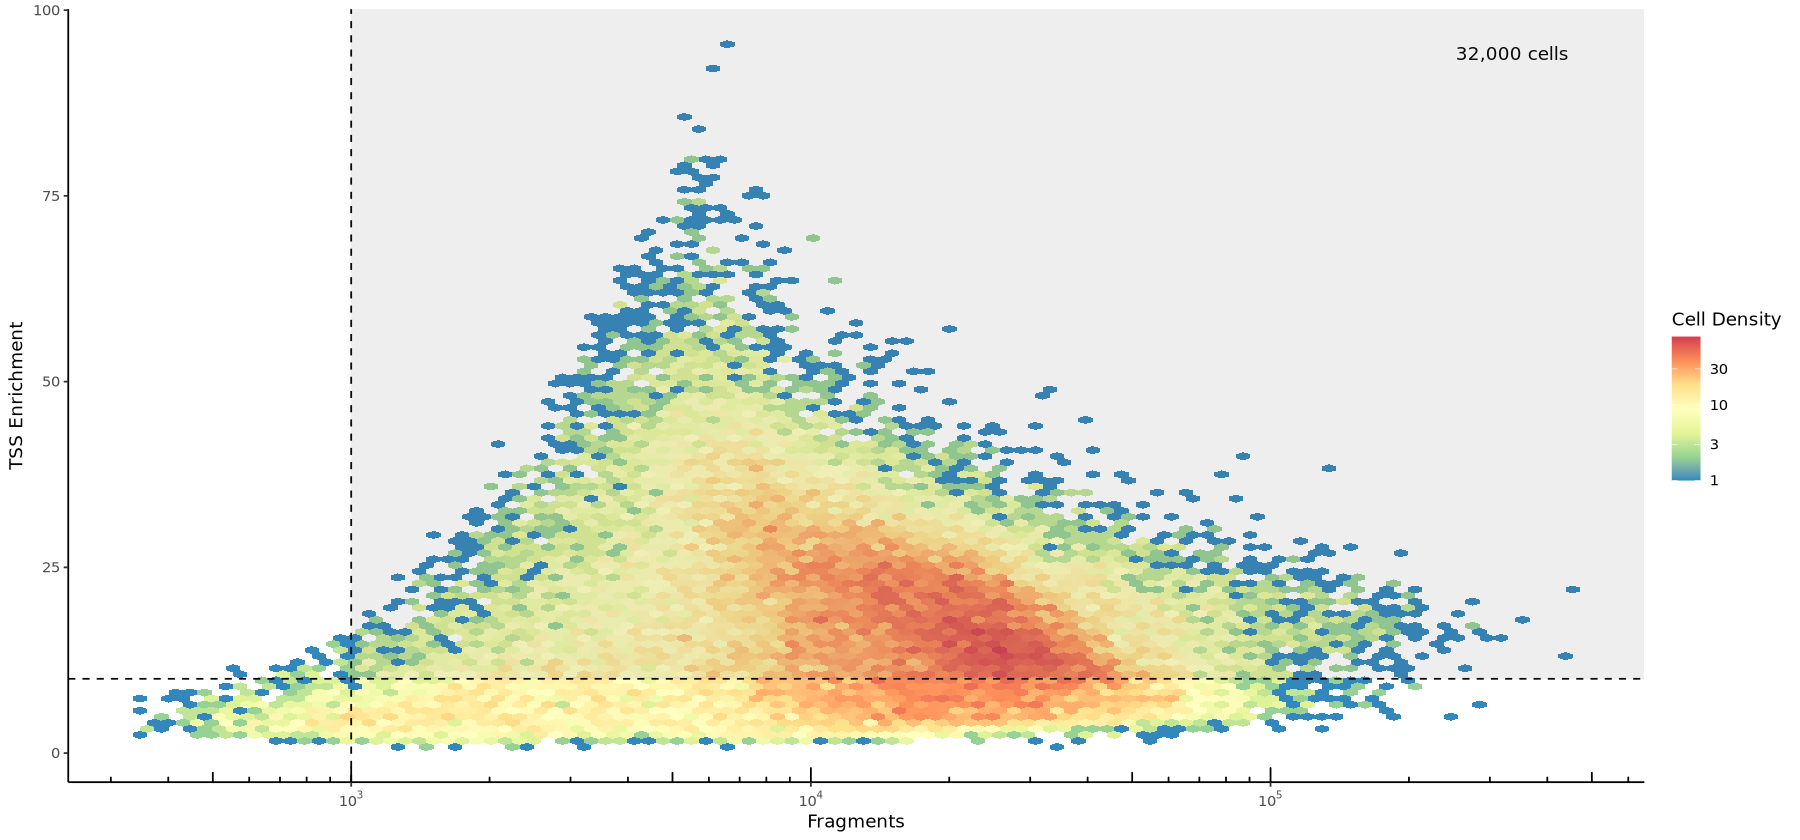

In [159]:
plot_tss_scatter(atac_qc_subsetted_cells, min_frags=1000, min_tss=10)

In [160]:
p1 <- plot_fragment_length(subsetted_cells)

In [161]:
p2 <- plot_tss_profile(subsetted_cells, genes_info)

In [162]:
library(patchwork)

In [163]:
options(repr.plot.width = 15, repr.plot.height = 7)

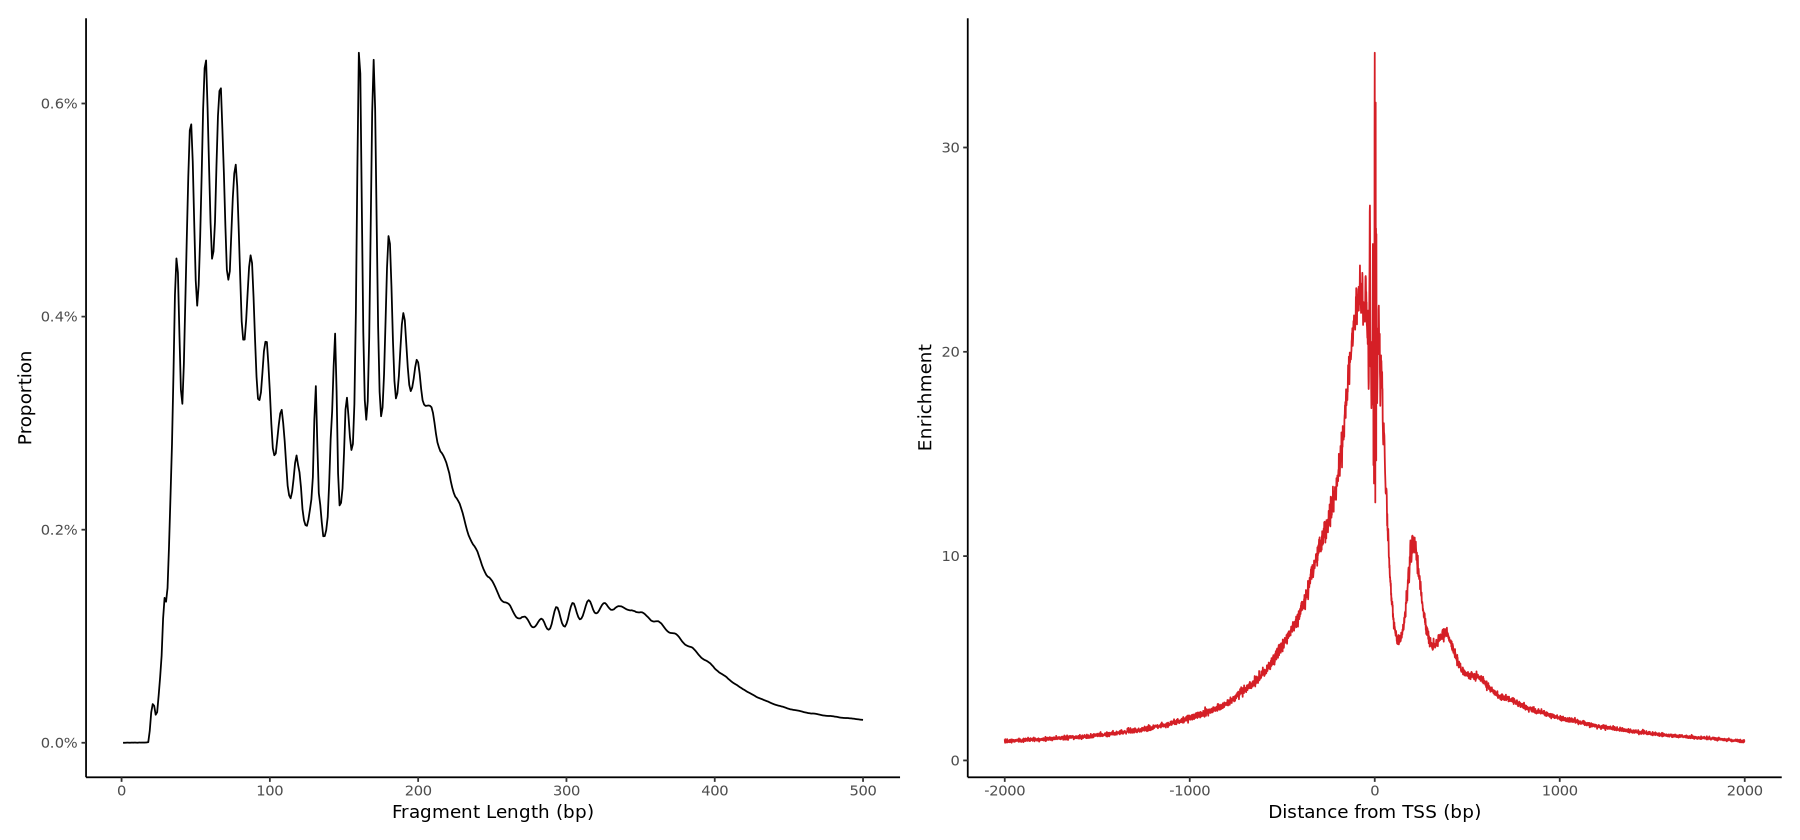

In [164]:
p1 + p2

In [165]:
# load atac peak count matrix:

counts_ATAC_mat <- 
    readRDS(here::here('r_objects', 'counts_ATAC_mat_for_BPCells.RDS'))

In [166]:
counts_ATAC_mat %>% head()

  [[ suppressing 34 column names '4_AAACAGCCAACACTTG-1', '4_AAACAGCCACCAAAGG-1', '4_AAACAGCCATAAGTTC-1' ... ]]



6 x 45549 sparse Matrix of class "dgCMatrix"
                                                                              
chr1-10063-10327   . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . 1
chr1-180726-180979 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
chr1-181323-181566 . . 1 . . . . . . 1 . . . . . . . . . . . . . . . . . . . .
chr1-190727-191632 . . . . . . . . . . . . . . . . . . 1 . . . . . . . 1 . . .
chr1-777615-779293 . . . . 1 1 2 . . 1 . . 1 2 . 1 . 1 . . . 1 . . 1 . . . . .
chr1-779602-779948 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                 
chr1-10063-10327   . . . . ......
chr1-180726-180979 . . . . ......
chr1-181323-181566 . . . . ......
chr1-190727-191632 . . . . ......
chr1-777615-779293 . . . . ......
chr1-779602-779948 . . . . ......

 .....suppressing 45515 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [167]:
counts_ATAC_mat <- 
    counts_ATAC_mat %>% 
    write_matrix_dir(dir = here::here('r_objects', 'bpcells_objects', 'raw_peaks_counts'))

* Consider calling convert_matrix_type if a compressed integer matrix is intended.
This message is displayed once every 8 hours.


In [168]:
counts_ATAC_mat

304034 x 45549 IterableMatrix object with class MatrixDir

Row names: chr1-10063-10327, chr1-180726-180979 ... chrY-26670358-26671639
Col names: 4_AAACAGCCAACACTTG-1, 4_AAACAGCCACCAAAGG-1 ... 150666_TTTGTTGGTGATCAGC-1

Data type: double
Storage order: column major

Queued Operations:
1. Load compressed matrix from directory /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24/r_objects/bpcells_objects/raw_peaks_counts

In [179]:
temp_DF <- data.frame(chr = rownames(counts_ATAC_mat) |> stringr::str_split_i(pattern = '-', i = 1),
                      start = rownames(counts_ATAC_mat) |> stringr::str_split_i(pattern = '-', i = 2) %>% as.numeric(),
                      end = rownames(counts_ATAC_mat) |> stringr::str_split_i(pattern = '-', i = 3) %>% as.numeric()) 

In [180]:
temp_DF %>% head()

chr  start  end   
1 chr1  10063  10327
2 chr1 180726 180979
3 chr1 181323 181566
4 chr1 190727 191632
5 chr1 777615 779293
6 chr1 779602 779948

In [181]:
temp_DF %>% dim()

[1] 304034      3

In [182]:
suppressPackageStartupMessages({
  library(GenomicRanges)
  library(Biostrings)
})

In [183]:
peaks_sorted <- dplyr::arrange(temp_DF, chr, start)

In [184]:
peaks_sorted |> head()

chr  start  end   
1 chr1  10063  10327
2 chr1 180726 180979
3 chr1 181323 181566
4 chr1 190727 191632
5 chr1 777615 779293
6 chr1 779602 779948

In [185]:
# my peaks were called using MACS2 according to the article. 
# Therefore, most likely, they are zero-based.

# convert to 1-based version  following the BPCells tutorial:

peaks_gr <- dplyr::mutate(peaks_sorted, start = start + 1)  |> as("GenomicRanges")

In [186]:
peaks_gr

GRanges object with 304034 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1       10064-10327      *
       [2]     chr1     180727-180979      *
       [3]     chr1     181324-181566      *
       [4]     chr1     190728-191632      *
       [5]     chr1     777616-779293      *
       ...      ...               ...    ...
  [304030]     chrY 21821572-21822130      *
  [304031]     chrY 21829020-21829544      *
  [304032]     chrY 26352948-26353241      *
  [304033]     chrY 26354175-26354520      *
  [304034]     chrY 26670359-26671639      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [187]:
peaks_gr %>% 
    saveRDS(here::here('r_objects', 'peaks_granges_for_TF_footprinting_by_BPCells.RDS'))

In [188]:
my_human_pwms_v2 <-  readRDS(here::here('r_objects', 'my_human_pwms_v2.RDS'))

In [190]:
metadata_copy <- metadata

In [191]:
metadata <- metadata_filtered

In [193]:
my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

my_margin <- ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 1), "cm"))  # Add margin to top, right, bottom, and left margins, respectively.

In [197]:
subsetted_fragments <- subsetted_cells

In [205]:
metadata$cell_type %>% unique() %>% length()

[1] 13

In [231]:
metadata$cell_type %>% levels()

[1] "endothelial cell"                              
 [2] "astrocyte"                                     
 [3] "oligodendrocyte"                               
 [4] "microglial cell"                               
 [5] "vascular associated smooth muscle cell"        
 [6] "inhibitory interneuron"                        
 [7] "pericyte"                                      
 [8] "glutamatergic neuron"                          
 [9] "radial glial cell"                             
[10] "oligodendrocyte precursor cell"                
[11] "neural progenitor cell"                        
[12] "medial ganglionic eminence derived interneuron"
[13] "caudal ganglionic eminence derived interneuron"

In [232]:
metadata$cell_type %>% levels() %>% sort()

[1] "astrocyte"                                     
 [2] "caudal ganglionic eminence derived interneuron"
 [3] "endothelial cell"                              
 [4] "glutamatergic neuron"                          
 [5] "inhibitory interneuron"                        
 [6] "medial ganglionic eminence derived interneuron"
 [7] "microglial cell"                               
 [8] "neural progenitor cell"                        
 [9] "oligodendrocyte"                               
[10] "oligodendrocyte precursor cell"                
[11] "pericyte"                                      
[12] "radial glial cell"                             
[13] "vascular associated smooth muscle cell"

In [234]:
sort(levels(metadata$cell_type)) %in% 'endothelial cell'

[1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE

In [239]:
# adjust according to number of unique cell types:

highlight_colours <- c(rep(x = "#D3D3D380", times = 13))

In [247]:
highlight_colours[sort(levels(metadata$cell_type)) %in% 'endothelial cell'] <- "#F6222EFF"

In [248]:
# adjust according to number of unique cell types:

highlight_EC_v2 <- 
    ggplot2::scale_color_manual(values = highlight_colours)

In [249]:
# I modified the TF footprint functions by adding cell type column name as parameter:

In [250]:
source(here::here('r_scripts', 'plot_TF_footprints_with_BPCells_package.r'))

In [251]:
options(repr.plot.width = 30, repr.plot.height = 7)

Motifs selected: SOX17

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$SOX17


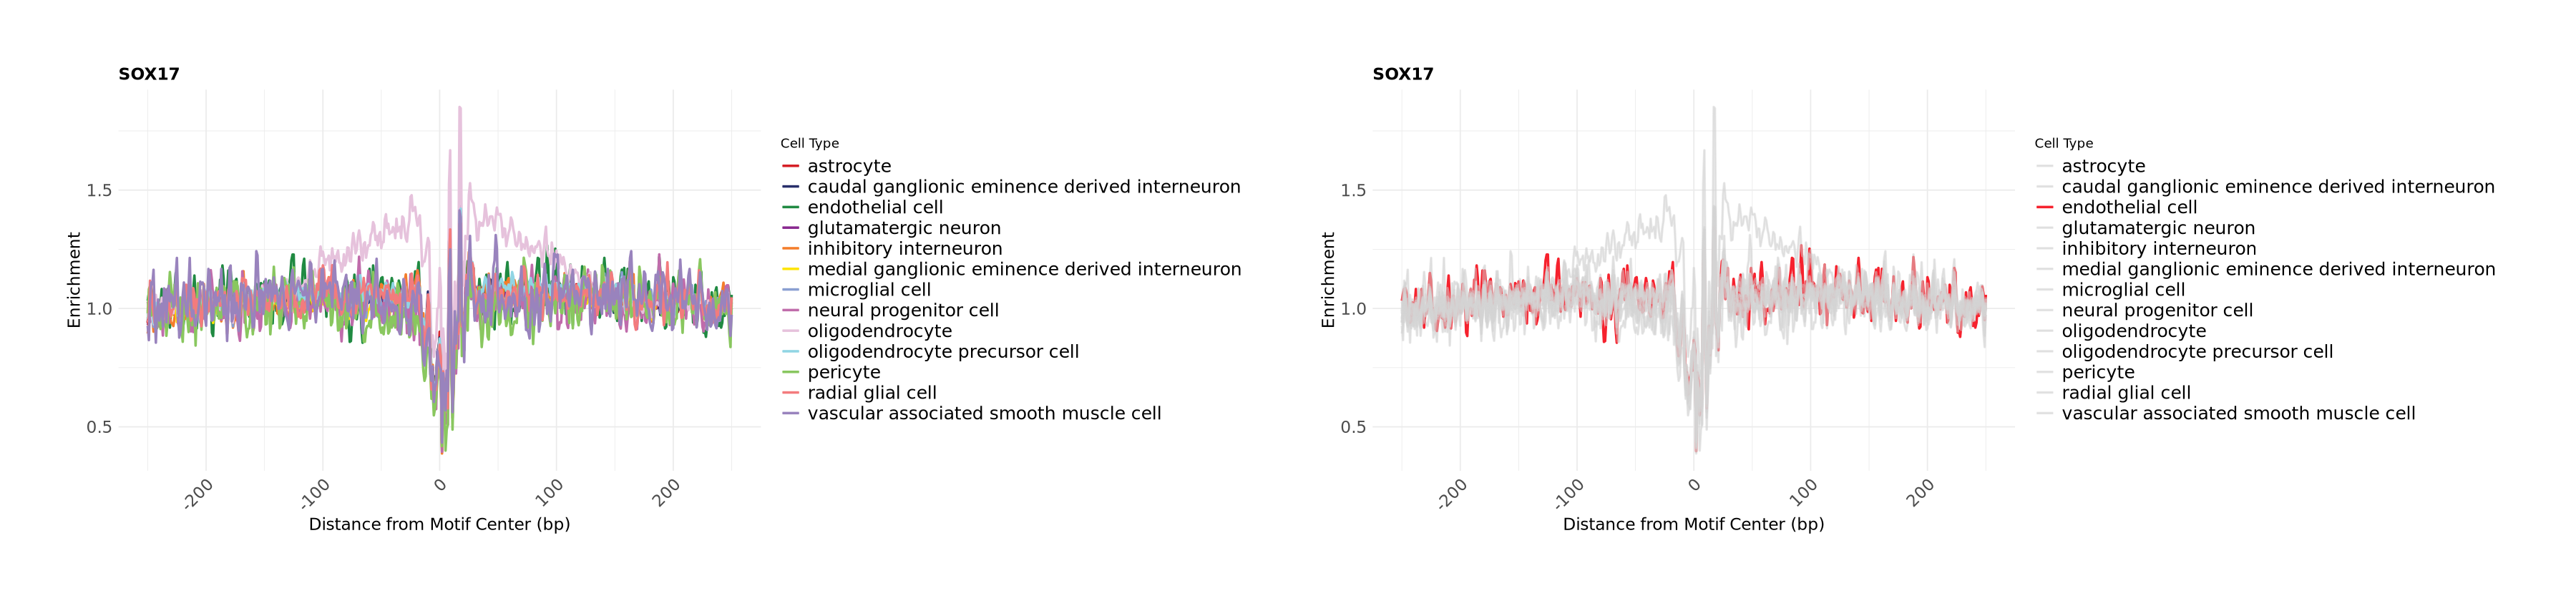

In [252]:
plot_multiple_TFs_w_highlights(tf_genes = 'SOX17', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info, 
                               colors_highlight =  highlight_EC_v2, 
                               set_theme = my_theme, 
                               set_margin = my_margin)

In [253]:
# I modified the TF footprint function by adding a new parameter to choose the cell type to highlight:

In [254]:
source(here::here('r_scripts', 'plot_TF_footprints_with_BPCells_package.r'))

In [251]:
options(repr.plot.width = 30, repr.plot.height = 7)

Motifs selected: SOX17

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$SOX17


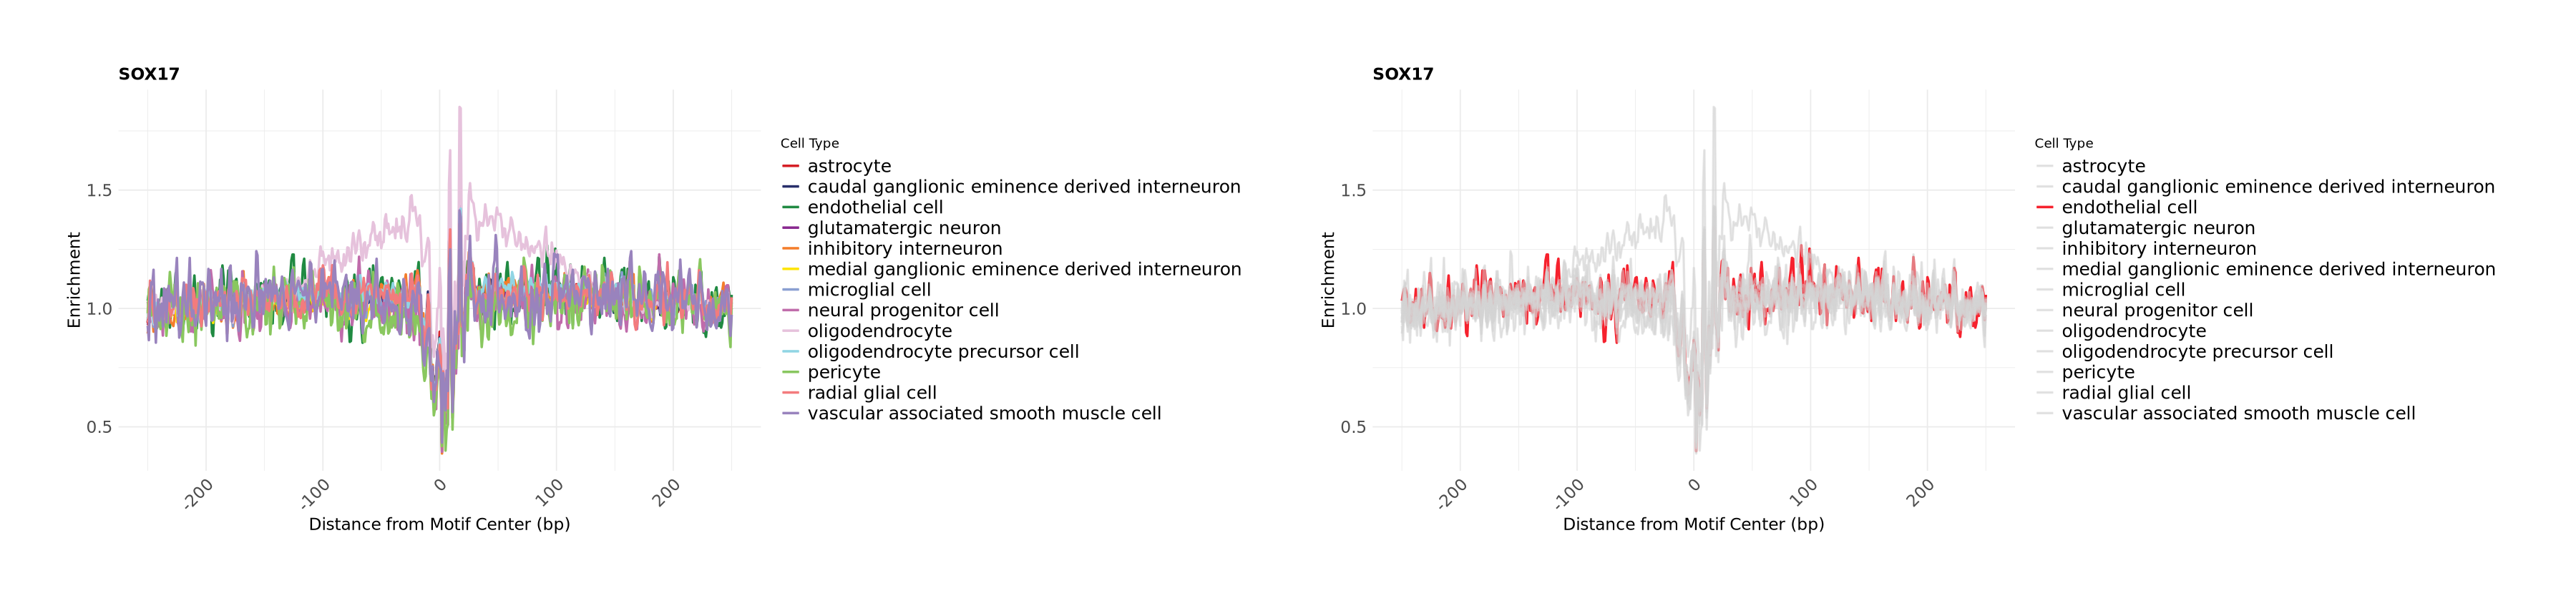

In [256]:
plot_multiple_TFs_w_highlights(tf_genes = 'SOX17', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               highlight_cell_type = 'endothelial cell',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info,  
                               set_theme = my_theme, 
                               set_margin = my_margin)

Motifs selected: SOX17

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$SOX17


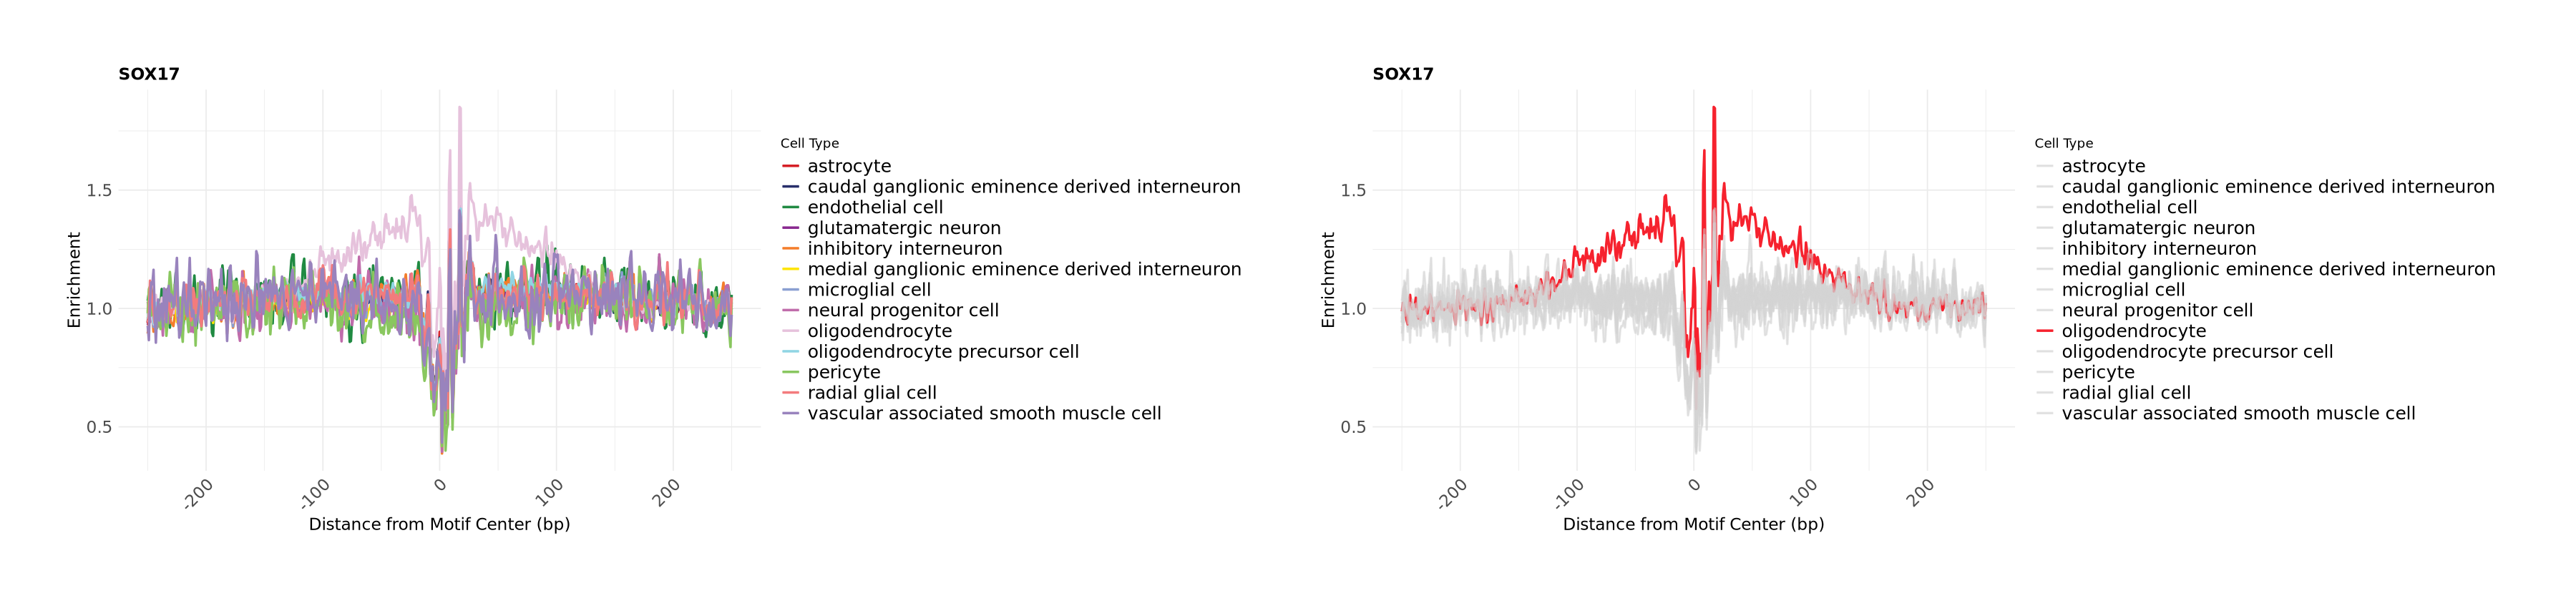

In [257]:
plot_multiple_TFs_w_highlights(tf_genes = 'SOX17', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               highlight_cell_type = 'oligodendrocyte',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info,  
                               set_theme = my_theme, 
                               set_margin = my_margin)

Motifs selected: FOXF2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$FOXF2


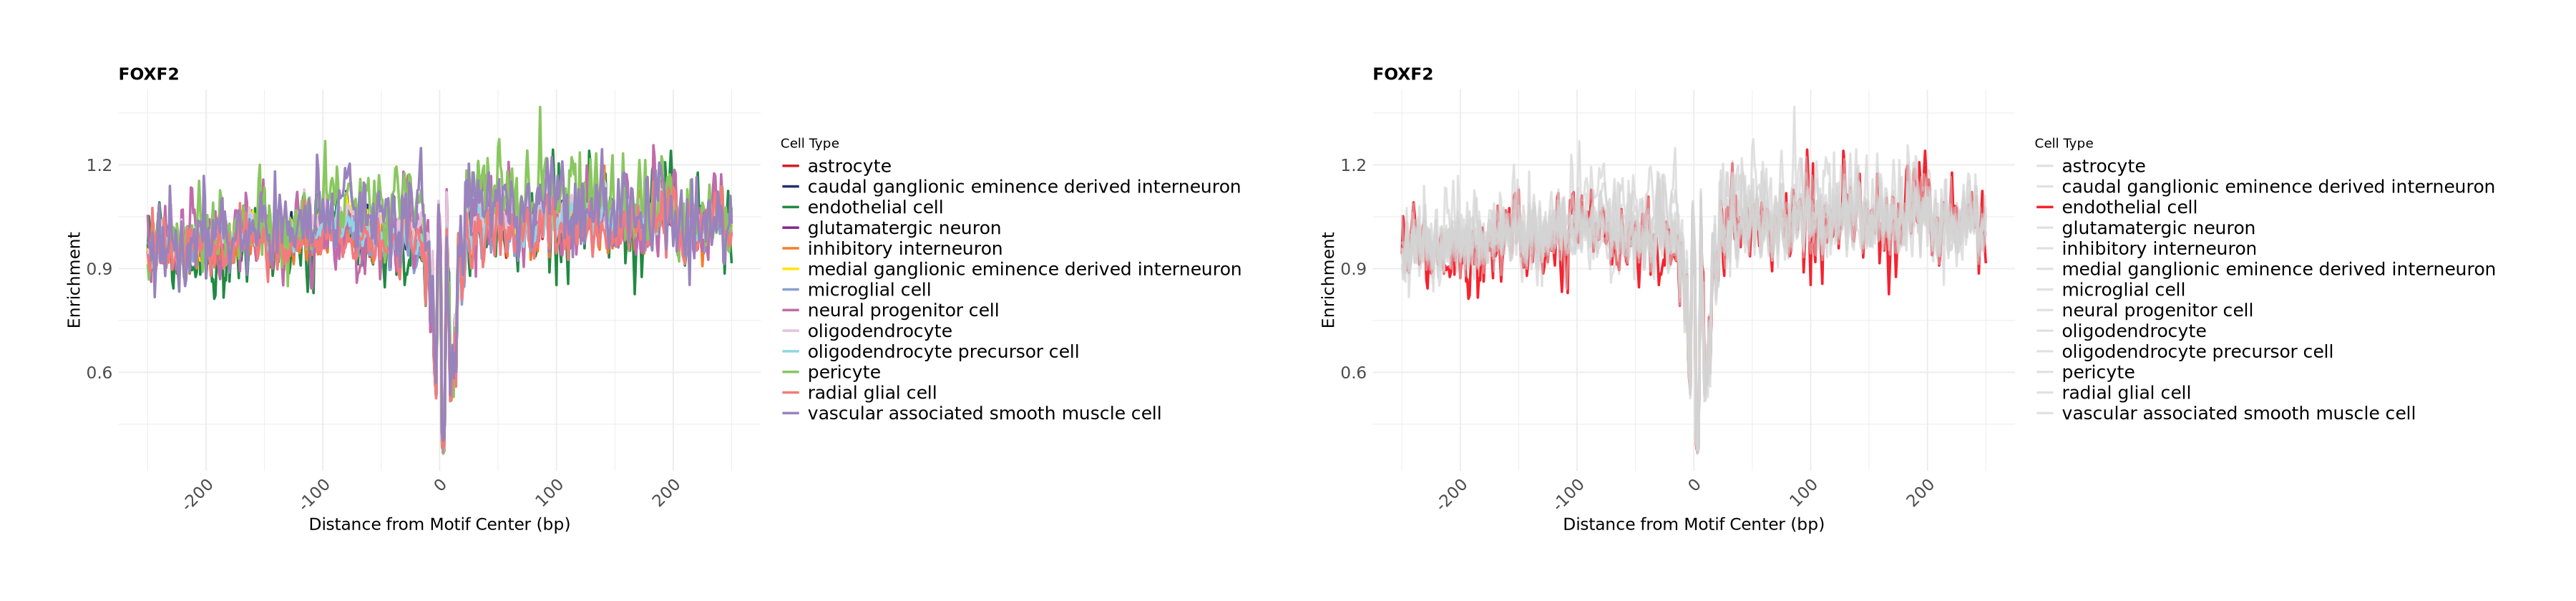

In [258]:
plot_multiple_TFs_w_highlights(tf_genes = 'FOXF2', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               highlight_cell_type = 'endothelial cell',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info,  
                               set_theme = my_theme, 
                               set_margin = my_margin)

Motifs selected: FOXF1

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$FOXF1


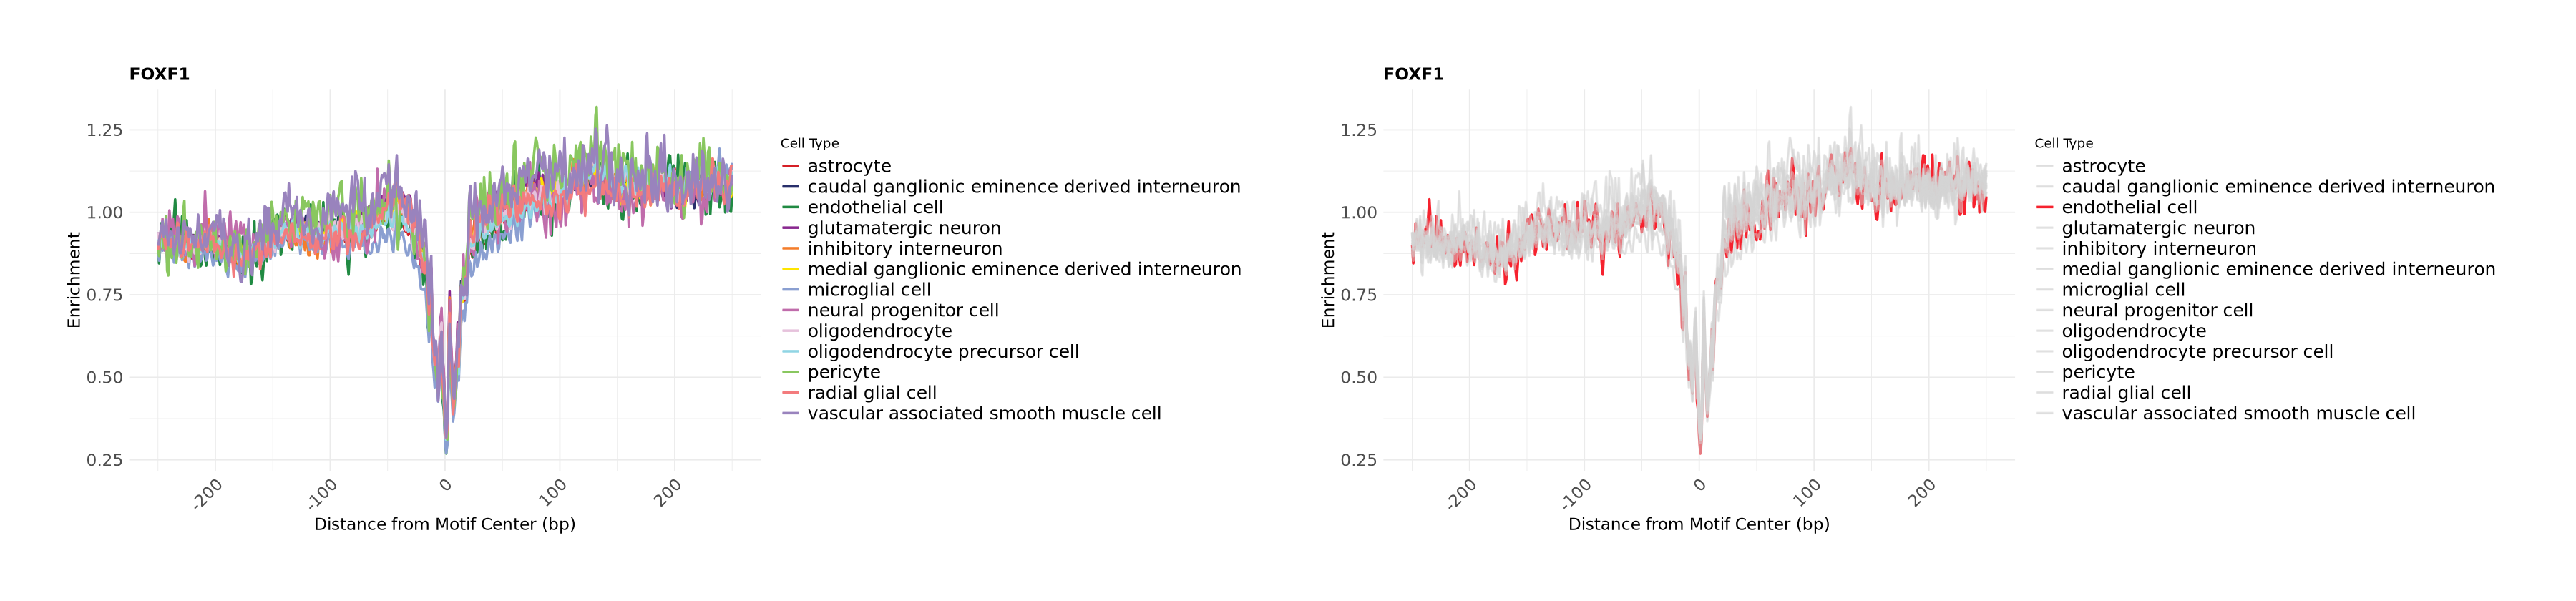

In [259]:
plot_multiple_TFs_w_highlights(tf_genes = 'FOXF1', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               highlight_cell_type = 'endothelial cell',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info,  
                               set_theme = my_theme, 
                               set_margin = my_margin)

Motifs selected: KLF4

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$KLF4


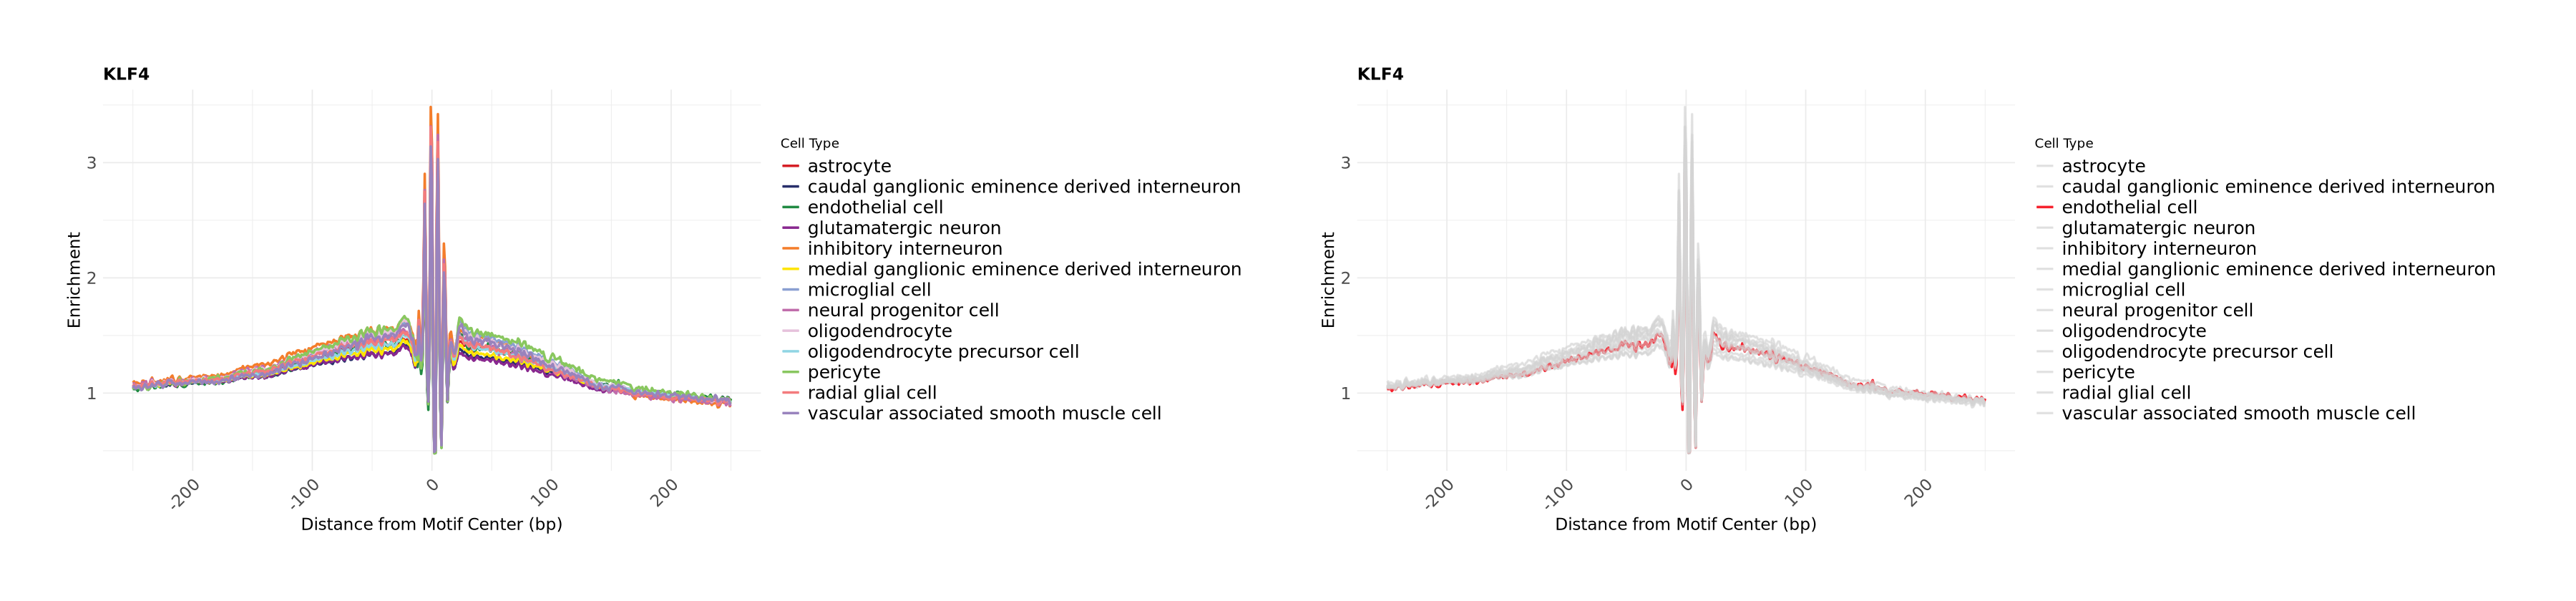

In [263]:
plot_multiple_TFs_w_highlights(tf_genes = 'KLF4', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               highlight_cell_type = 'endothelial cell',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info,  
                               set_theme = my_theme, 
                               set_margin = my_margin)

Motifs selected: ETV2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$ETV2


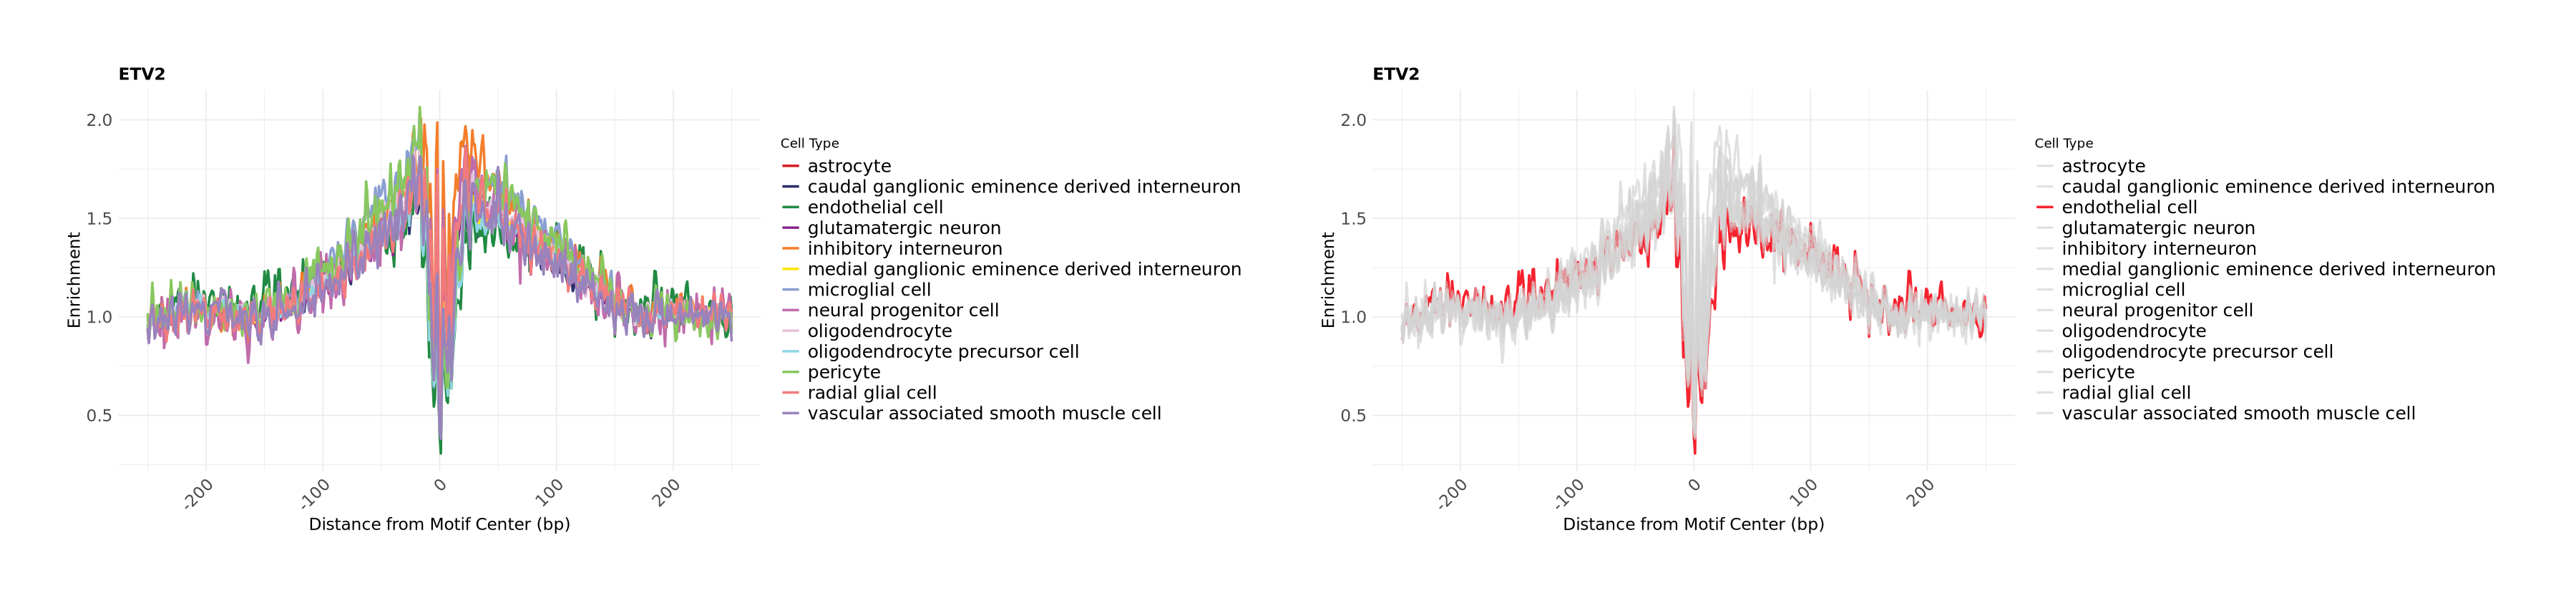

In [264]:
plot_multiple_TFs_w_highlights(tf_genes = 'ETV2', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               highlight_cell_type = 'endothelial cell',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info,  
                               set_theme = my_theme, 
                               set_margin = my_margin)

Motifs selected: RFX3

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


$RFX3


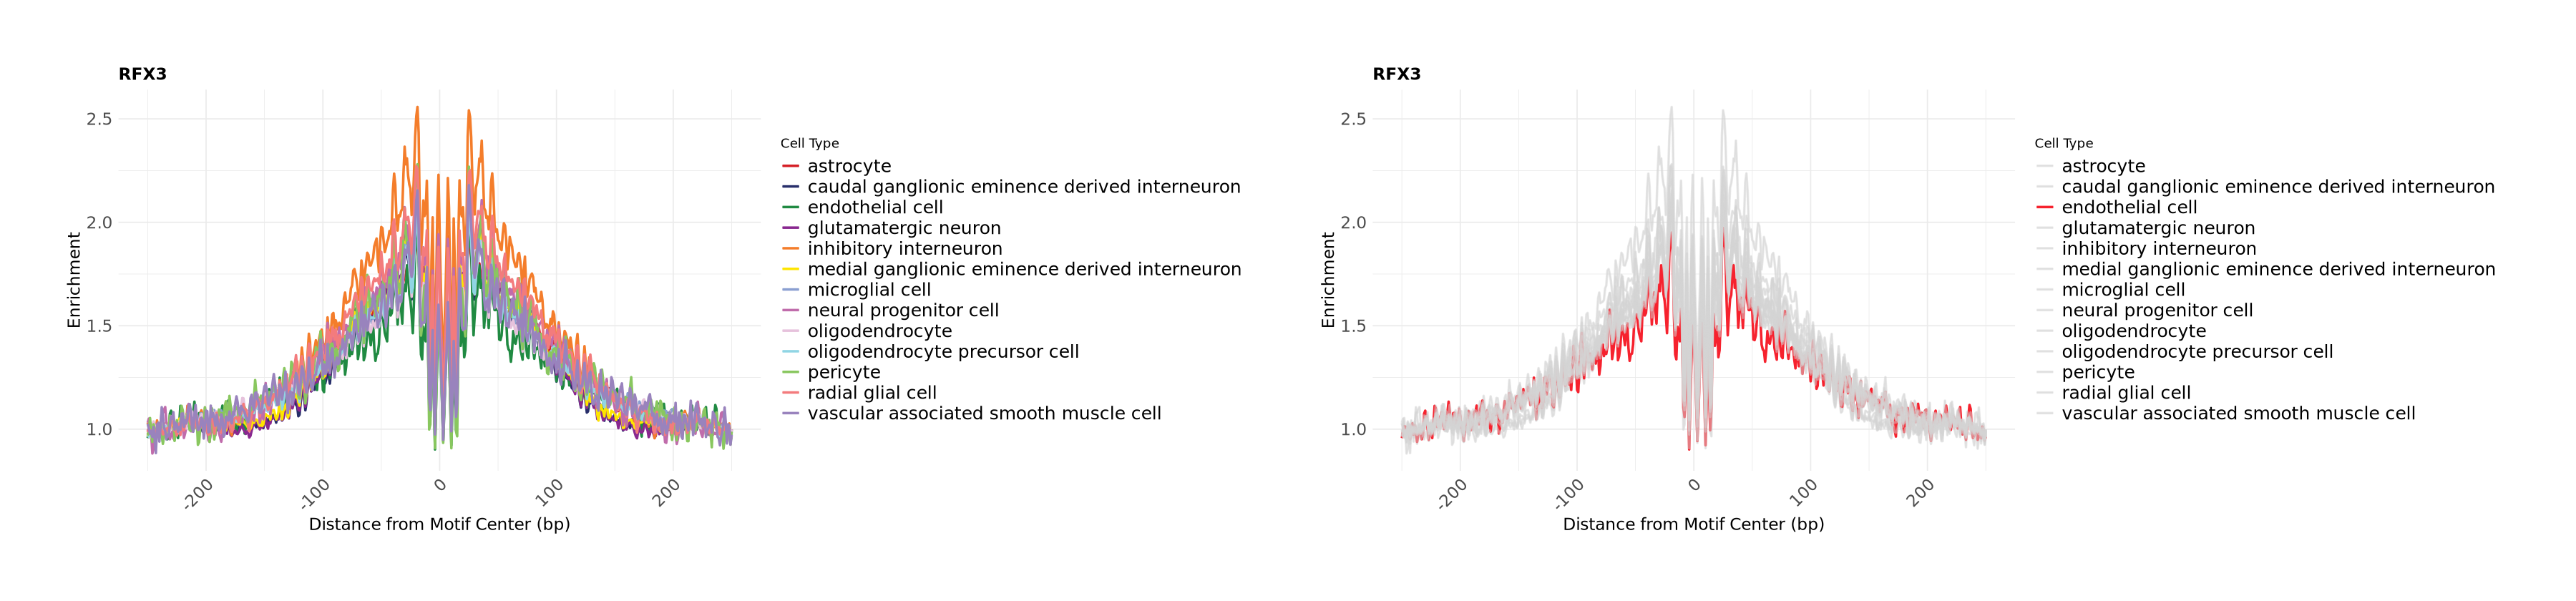

In [265]:
plot_multiple_TFs_w_highlights(tf_genes = 'RFX3', 
                               peaks_gr = peaks_gr, 
                               fragments = subsetted_fragments, 
                               metadata = metadata, 
                               cell_type_col_name = 'cell_type',
                               highlight_cell_type = 'endothelial cell',
                               pwms_mat = my_human_pwms_v2, 
                               genes =  genes_info,  
                               set_theme = my_theme, 
                               set_margin = my_margin)

I will generate and save some objects necessary to view genome tracks.

I will also generate pseudo-bulked normalized rna count matrix of Zhu et al dataset.

I will use it to view genome tracks.

In [266]:
ls()

[1] "analyze_multiple_tf_footprints" "atac_qc_all"                   
 [3] "atac_qc_subsetted_cells"        "blacklist"                     
 [5] "bpcells_lib"                    "chrom_sizes"                   
 [7] "counts_ATAC_mat"                "duplicated_barcodes"           
 [9] "frags"                          "genes_info"                    
[11] "highlight_EC_v2"                "highlight_colours"             
[13] "metadata"                       "metadata_cellnames"            
[15] "metadata_copy"                  "metadata_filtered"             
[17] "my_human_pwms_v2"               "my_margin"                     
[19] "my_theme"                       "p1"                            
[21] "p2"                             "peaks_gr"                      
[23] "peaks_sorted"                   "plot_multiple_TFs_w_highlights"
[25] "subsetted_cells"                "subsetted_fragments"           
[27] "temp_DF"

In [268]:
atac_qc_subsetted_cells %>% head()

cellName           TSSEnrichment nFrags subNucleosomal
AAACAGCCAACACTTG-1 AAACAGCCAACACTTG-1 14.486712      17871  6736         
AAACAGCCACCAAAGG-1 AAACAGCCACCAAAGG-1 20.715918      21312  9397         
AAACAGCCATAAGTTC-1 AAACAGCCATAAGTTC-1 18.106068      46479 18244         
AAACATGCATAGTCAT-1 AAACATGCATAGTCAT-1 14.147188      22291  8179         
AAACATGCATTGTCAG-1 AAACATGCATTGTCAG-1  6.656328     174513 96351         
AAACATGCATTGTGAT-1 AAACATGCATTGTGAT-1 13.302557      32568 15381         
                   monoNucleosomal multiNucleosomal ReadsInTSS ReadsFlankingTSS
AAACAGCCAACACTTG-1  7272            3863             695        95             
AAACAGCCACCAAAGG-1  7525            4390             816        78             
AAACAGCCATAAGTTC-1 18242            9993            1847       202             
AAACATGCATAGTCAT-1  8970            5142             693        97             
AAACATGCATTGTCAG-1 52778           25384             837       249             
AAACATGCATTGTGAT-1 11232            5955            1095       163             
                   ReadsInPromoter ReadsInBlacklist
AAACAGCCAACACTTG-1  3739            169            
AAACAGCCACCAAAGG-1  4121            263            
AAACAGCCATAAGTTC-1 10248            307            
AAACATGCATAGTCAT-1  4226            168            
AAACATGCATTGTCAG-1  5370           3737            
AAACATGCATTGTGAT-1  6345            382

In [269]:
read_counts <- atac_qc_subsetted_cells$nFrags[
  match(cellNames(x = subsetted_fragments), atac_qc_subsetted_cells$cellName)
]

In [270]:
read_counts %>% saveRDS(here::here('r_objects', 'atac_read_counts_for_subsetted_cells_by_BPCells.RDS'))

In [271]:
transcripts_info <- read_gencode_transcripts("./references", release="42")
head(transcripts_info)

chr  source feature    start  end    score strand frame gene_id          
1 chr1 HAVANA transcript  65418  71585 .     +      .     ENSG00000186092.7
2 chr1 HAVANA exon        65418  65433 .     +      .     ENSG00000186092.7
3 chr1 HAVANA exon        65519  65573 .     +      .     ENSG00000186092.7
4 chr1 HAVANA exon        69036  71585 .     +      .     ENSG00000186092.7
5 chr1 HAVANA transcript 450739 451678 .     -      .     ENSG00000284733.2
6 chr1 HAVANA exon       450739 451678 .     -      .     ENSG00000284733.2
  gene_type      gene_name transcript_id     MANE_Select
1 protein_coding OR4F5     ENST00000641515.2 TRUE       
2 protein_coding OR4F5     ENST00000641515.2 TRUE       
3 protein_coding OR4F5     ENST00000641515.2 TRUE       
4 protein_coding OR4F5     ENST00000641515.2 TRUE       
5 protein_coding OR4F29    ENST00000426406.4 TRUE       
6 protein_coding OR4F29    ENST00000426406.4 TRUE

In [272]:
# generate pseudobulked matrix:

In [276]:
list.files('r_objects') %>% grep(pattern = 'rna', ignore.case = TRUE, value = TRUE)

[1] "counts_RNA_mat_for_BPCells.RDS"

In [277]:
counts_RNA <- readRDS(here::here('r_objects', 'counts_RNA_mat_for_BPCells.RDS'))

In [278]:
counts_RNA %>% head()

  [[ suppressing 34 column names '4_AAACAGCCAACACTTG-1', '4_AAACAGCCACCAAAGG-1', '4_AAACAGCCATAAGTTC-1' ... ]]



6 x 45549 sparse Matrix of class "dgCMatrix"
                                                                              
AL627309.1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.5 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL669831.2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
LINC01409  . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . 1
FAM87B     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
LINC01128  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                 
AL627309.1 ......
AL627309.5 ......
AL669831.2 ......
LINC01409  ......
FAM87B     ......
LINC01128  ......

 .....suppressing 45515 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [279]:
metadata_filtered$cell_barcodes %>% head()

[1] "4_AAACAGCCAACACTTG-1" "4_AAACAGCCACCAAAGG-1" "4_AAACAGCCATAAGTTC-1"
[4] "4_AAACATGCATAGTCAT-1" "4_AAACATGCATTGTCAG-1" "4_AAACATGCATTGTGAT-1"

In [281]:
table(metadata_filtered$cell_barcodes %in% colnames(counts_RNA))


 TRUE 
42928 

In [282]:
counts_RNA_filtered <- counts_RNA[, metadata_filtered$cell_barcodes]

In [283]:
counts_RNA_filtered %>% dim()

[1] 30146 42928

In [284]:
identical(metadata_filtered$cell_barcodes, colnames(counts_RNA_filtered))

[1] TRUE

In [285]:
colnames(counts_RNA_filtered) <- metadata_filtered$cell_barcodes_in_fragments_file

In [286]:
# Now, we have cout matrix with cell names in same format with that in fragment file.

# The cells were also subsetted and now identical with the cells in the fragment file.

counts_RNA_filtered <- counts_RNA_filtered %>% 
                            write_matrix_dir(dir = here::here('r_objects', 'bpcells_objects', 'raw_RNA_counts_w_subsetted_cells'))

In [287]:
counts_RNA_filtered

30146 x 42928 IterableMatrix object with class MatrixDir

Row names: AL627309.1, AL627309.5 ... AC007325.2
Col names: AAACAGCCAACACTTG-1, AAACAGCCACCAAAGG-1 ... TTTGTTGGTGATCAGC-1

Data type: double
Storage order: column major

Queued Operations:
1. Load compressed matrix from directory /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24/r_objects/bpcells_objects/raw_RNA_counts_w_subsetted_cells

In [288]:
rm(counts_RNA)

In [289]:
mat_rna_pseudobulk <- pseudobulk_matrix(mat = counts_RNA_filtered, cell_groups = metadata_filtered$cell_type, method = "sum")

In [290]:
# Normalize by reads-per-cell
mat_rna_norm_pseudobulk <- multiply_cols(mat = mat_rna_pseudobulk, 1/Matrix::colSums(mat_rna_pseudobulk))

# Log normalization
mat_rna_norm_pseudobulk <- log1p(mat_rna_norm_pseudobulk * 10000) # Log normalization

In [291]:
mat_rna_norm_pseudobulk %>% head()

endothelial cell astrocyte    oligodendrocyte microglial cell
AL627309.1 0.01120230       0.0174216200 0.0054523907    0.0456850560   
AL627309.5 0.01860138       0.0366132067 0.0232372250    0.0616826230   
AL669831.2 0.00000000       0.0008569138 0.0005465788    0.0006490212   
LINC01409  0.18150449       0.2109859526 0.1203879950    0.2889340138   
FAM87B     0.00000000       0.0017130939 0.0000000000    0.0012976214   
LINC01128  0.24813424       0.1326760391 0.0584010714    0.1076119953   
           vascular associated smooth muscle cell inhibitory interneuron
AL627309.1 0.00000000                             0.006982603           
AL627309.5 0.01500227                             0.013916788           
AL669831.2 0.00000000                             0.001555909           
LINC01409  0.13417765                             0.126360236           
FAM87B     0.00000000                             0.000000000           
LINC01128  0.08681253                             0.244644579           
           pericyte    glutamatergic neuron radial glial cell
AL627309.1 0.016471900 0.0144271813         0.003973105      
AL627309.5 0.004143481 0.0326485748         0.021659280      
AL669831.2 0.000000000 0.0023537287         0.001988526      
LINC01409  0.181737812 0.2497948149         0.146046349      
FAM87B     0.000000000 0.0007851919         0.005953753      
LINC01128  0.160746519 0.2390292828         0.176537275      
           oligodendrocyte precursor cell neural progenitor cell
AL627309.1 0.008522507                    0.006543537           
AL627309.5 0.029516320                    0.000000000           
AL669831.2 0.001603513                    0.000000000           
LINC01409  0.176115555                    0.099881424           
FAM87B     0.000000000                    0.000000000           
LINC01128  0.071223079                    0.157593151           
           medial ganglionic eminence derived interneuron
AL627309.1 0.018603995                                   
AL627309.5 0.064171963                                   
AL669831.2 0.003308309                                   
LINC01409  0.213083582                                   
FAM87B     0.001103986                                   
LINC01128  0.196886107                                   
           caudal ganglionic eminence derived interneuron
AL627309.1 0.009680879                                   
AL627309.5 0.052780520                                   
AL669831.2 0.002775542                                   
LINC01409  0.227696801                                   
FAM87B     0.000000000                                   
LINC01128  0.209830818

In [292]:
mat_rna_norm_pseudobulk %>% saveRDS(file = here::here('r_objects', 'mat_rna_norm_pseudobulk_w_subsetted_cells.RDS'))

In [293]:
mat_rna_norm_pseudobulk %>% head()

endothelial cell astrocyte    oligodendrocyte microglial cell
AL627309.1 0.01120230       0.0174216200 0.0054523907    0.0456850560   
AL627309.5 0.01860138       0.0366132067 0.0232372250    0.0616826230   
AL669831.2 0.00000000       0.0008569138 0.0005465788    0.0006490212   
LINC01409  0.18150449       0.2109859526 0.1203879950    0.2889340138   
FAM87B     0.00000000       0.0017130939 0.0000000000    0.0012976214   
LINC01128  0.24813424       0.1326760391 0.0584010714    0.1076119953   
           vascular associated smooth muscle cell inhibitory interneuron
AL627309.1 0.00000000                             0.006982603           
AL627309.5 0.01500227                             0.013916788           
AL669831.2 0.00000000                             0.001555909           
LINC01409  0.13417765                             0.126360236           
FAM87B     0.00000000                             0.000000000           
LINC01128  0.08681253                             0.244644579           
           pericyte    glutamatergic neuron radial glial cell
AL627309.1 0.016471900 0.0144271813         0.003973105      
AL627309.5 0.004143481 0.0326485748         0.021659280      
AL669831.2 0.000000000 0.0023537287         0.001988526      
LINC01409  0.181737812 0.2497948149         0.146046349      
FAM87B     0.000000000 0.0007851919         0.005953753      
LINC01128  0.160746519 0.2390292828         0.176537275      
           oligodendrocyte precursor cell neural progenitor cell
AL627309.1 0.008522507                    0.006543537           
AL627309.5 0.029516320                    0.000000000           
AL669831.2 0.001603513                    0.000000000           
LINC01409  0.176115555                    0.099881424           
FAM87B     0.000000000                    0.000000000           
LINC01128  0.071223079                    0.157593151           
           medial ganglionic eminence derived interneuron
AL627309.1 0.018603995                                   
AL627309.5 0.064171963                                   
AL669831.2 0.003308309                                   
LINC01409  0.213083582                                   
FAM87B     0.001103986                                   
LINC01128  0.196886107                                   
           caudal ganglionic eminence derived interneuron
AL627309.1 0.009680879                                   
AL627309.5 0.052780520                                   
AL669831.2 0.002775542                                   
LINC01409  0.227696801                                   
FAM87B     0.000000000                                   
LINC01128  0.209830818

In [294]:
rm(mat_rna_pseudobulk)

I modified the genome coverage plotting functions to explicitly control the order of cell types !!!

In [362]:
source(here::here('r_scripts', 'plot_genome_coverage_functions_using_BPCells.r'))

In [363]:
options(repr.plot.width = 18, repr.plot.height = 10)

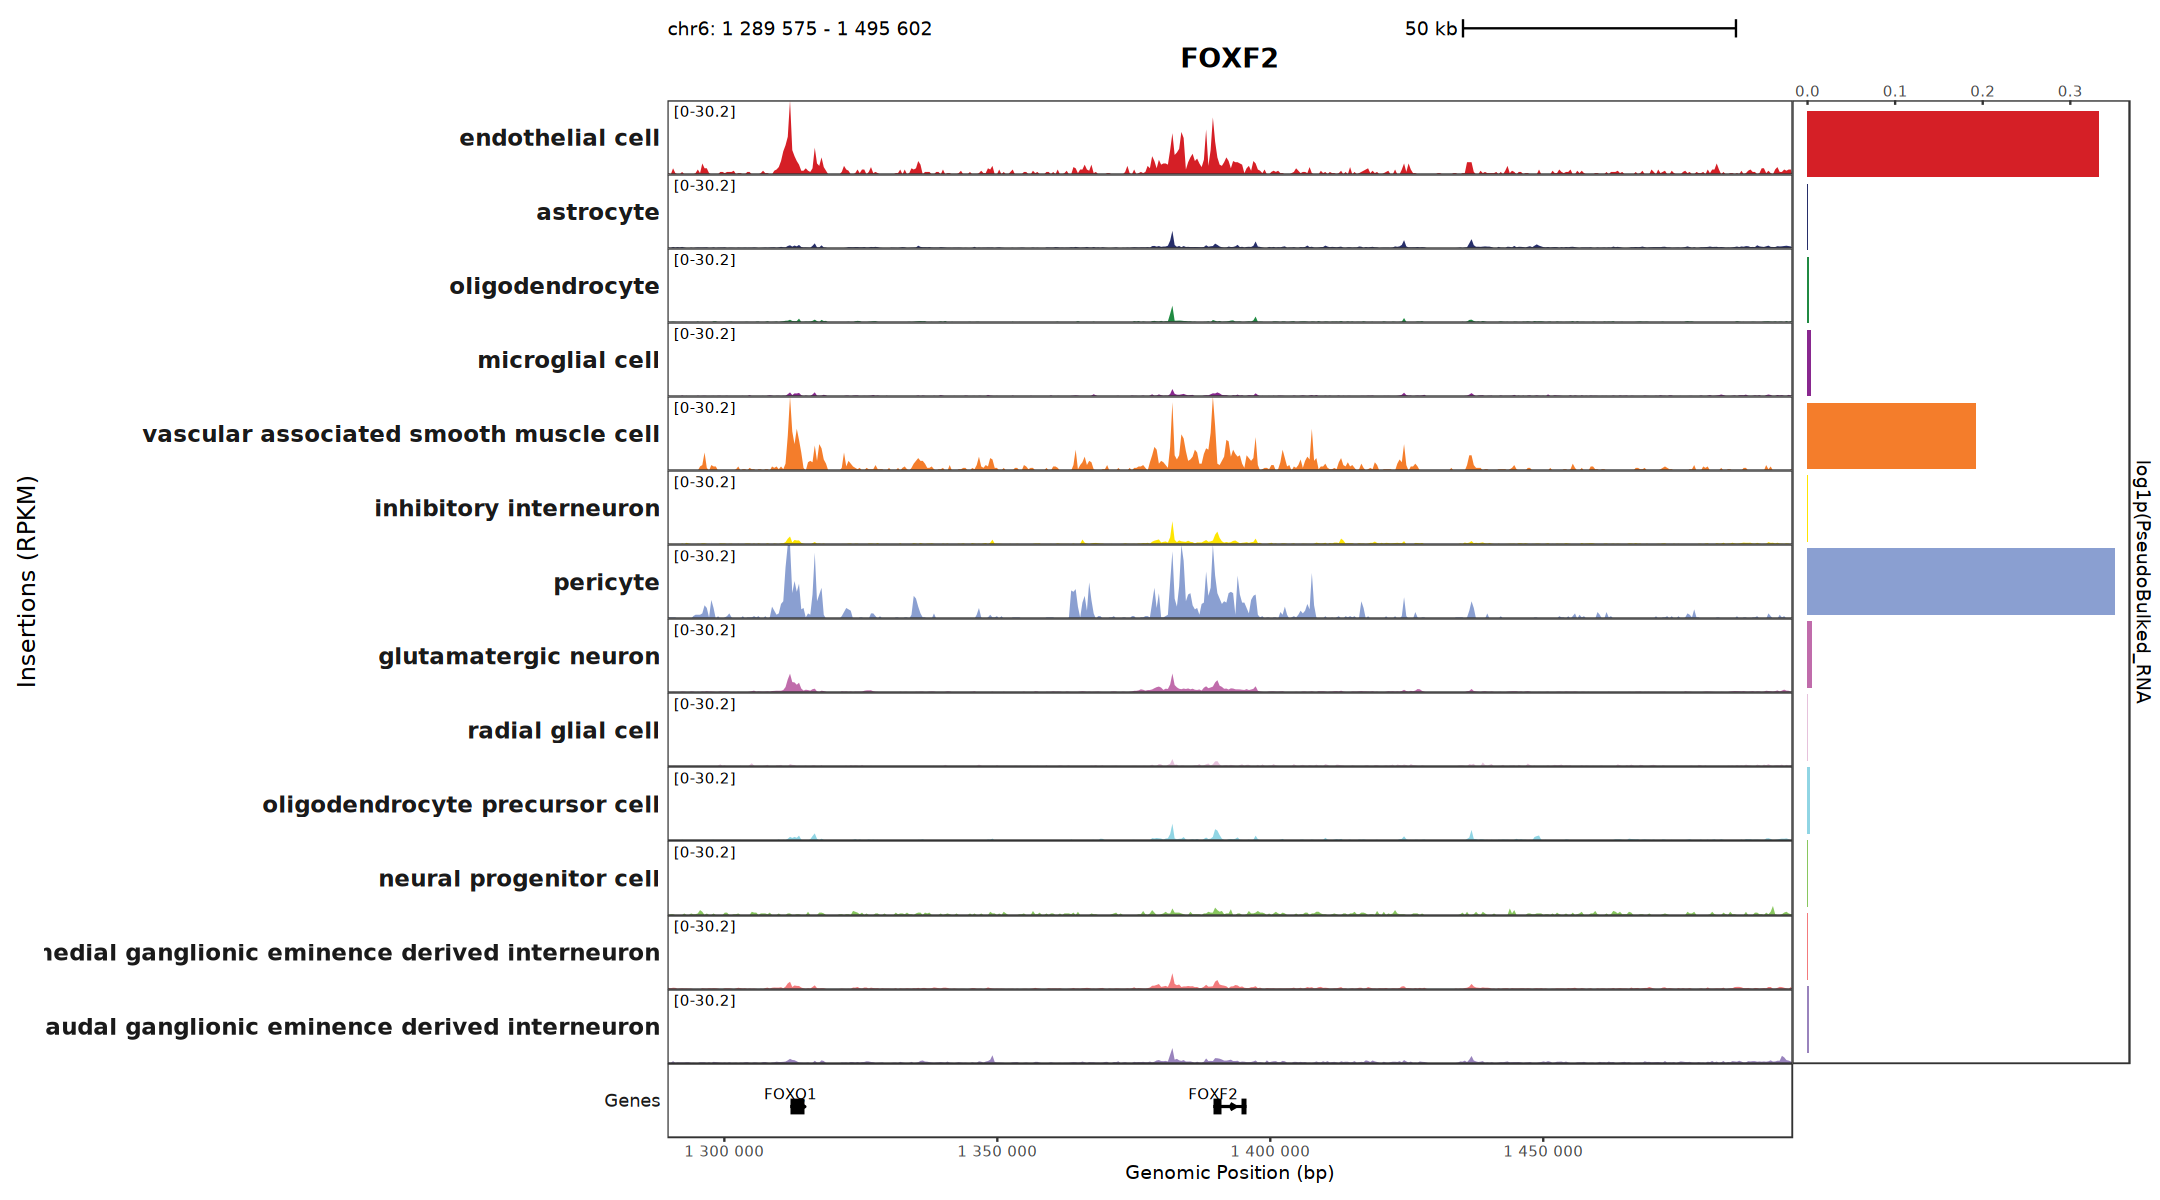

In [364]:
plot_gene_coverage_w_BULK_expression(total_reads_per_cell = read_counts,
                                       bulked_rna_data = mat_rna_norm_pseudobulk,
                                       bins_value = 500, 
                                       extend.bp = 1e5 , 
                                       genes_info = genes_info,
                                       transcripts_info = transcripts_info,
                                       fragments = subsetted_fragments,  
                                       gene = 'FOXF2', 
                                       cell_types = metadata_filtered$cell_type)

In [367]:
mat_rna_norm_pseudobulk['FOXF2',, drop = FALSE]

endothelial cell astrocyte    oligodendrocyte microglial cell
FOXF2 0.3323816        0.0004285487 0.001638841     0.003887824    
      vascular associated smooth muscle cell inhibitory interneuron pericyte 
FOXF2 0.1919543                              0                      0.3502059
      glutamatergic neuron radial glial cell oligodendrocyte precursor cell
FOXF2 0.00470193           0                 0.002137446                   
      neural progenitor cell medial ganglionic eminence derived interneuron
FOXF2 0                      0                                             
      caudal ganglionic eminence derived interneuron
FOXF2 0.001388734

In [368]:
counts_ATAC_mat %>% head()

6 x 45549 IterableMatrix object with class MatrixSubset

Row names: chr1-10063-10327, chr1-180726-180979 ... chr1-779602-779948
Col names: 4_AAACAGCCAACACTTG-1, 4_AAACAGCCACCAAAGG-1 ... 150666_TTTGTTGGTGATCAGC-1

Data type: double
Storage order: column major

Queued Operations:
1. Load compressed matrix from directory /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24/r_objects/bpcells_objects/raw_peaks_counts
2. Select rows: 1, 2 ... 6 and cols: all

[1] "Expanded region: chr1 990719 1011023"
[1] "Original region: chr1 1000719 1001023"


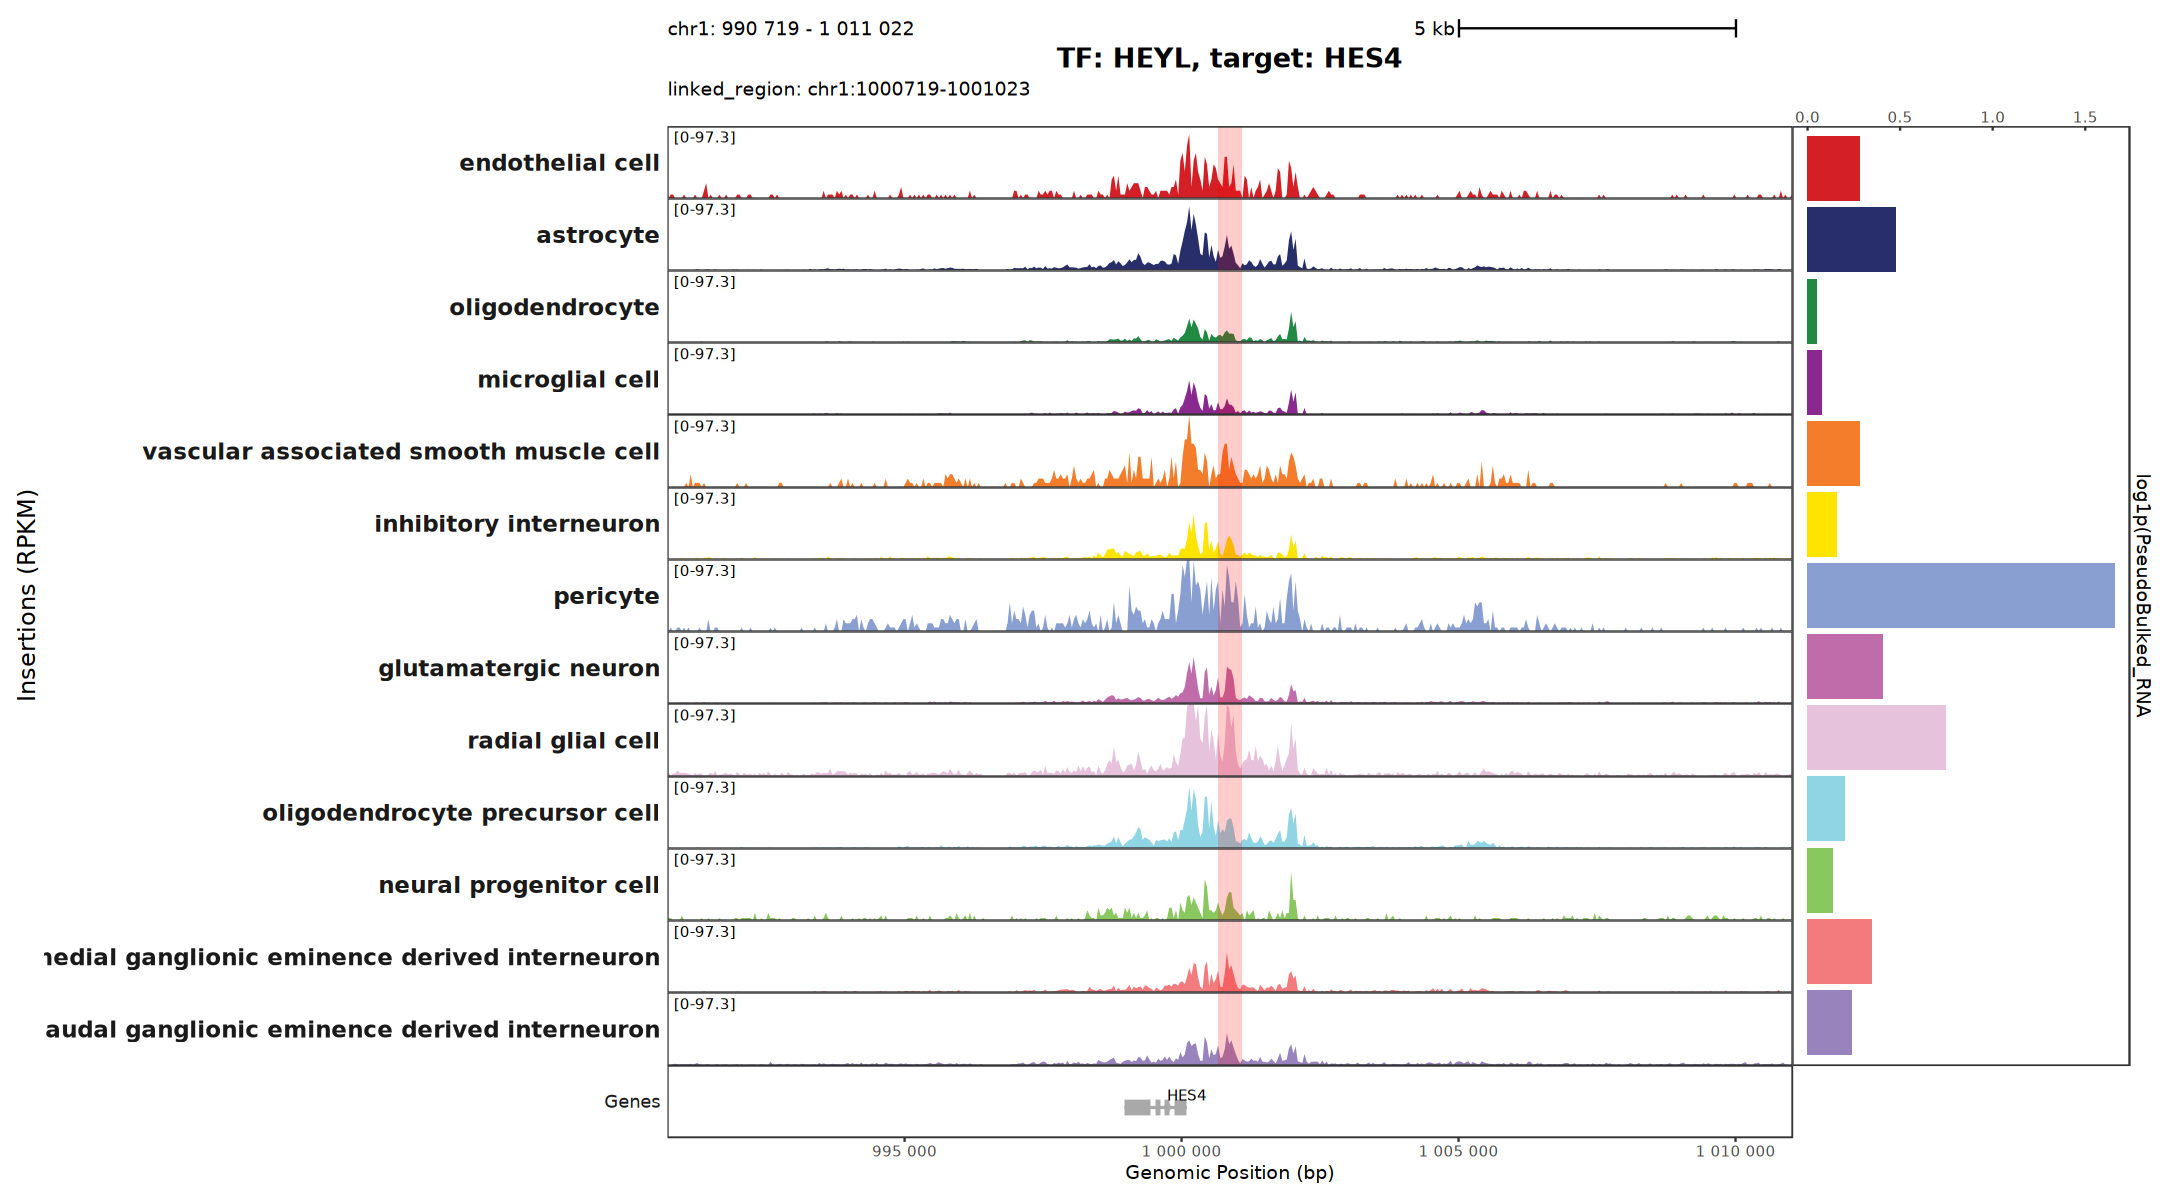

In [372]:
# zoomed out view:

plot_detailed_genome_coverage_w_BULKED_EXPRESSION(
                                                   highlight_buffer = 50, # default.
                                                   total_reads_per_cell = read_counts,
                                                   tf_name = "HEYL", 
                                                   target_name = "HES4",
                                                   my_region = "chr1:1000719-1001023",
                                                   bulked_rna_data = mat_rna_norm_pseudobulk,
                                                   bins_value = 500, 
                                                   extend.bp = 10000, # extend more to zoom out.
                                                   genes_info = genes_info,
                                                   transcripts_info = transcripts_info,
                                                   fragments = subsetted_fragments,  
                                                   cell_types = metadata$cell_type)

In [370]:
mat_rna_norm_pseudobulk['HES4',, drop = FALSE]

endothelial cell astrocyte oligodendrocyte microglial cell
HES4 0.2826894        0.4724721 0.04751202      0.07562409     
     vascular associated smooth muscle cell inhibitory interneuron pericyte
HES4 0.2813976                              0.1554375              1.656975
     glutamatergic neuron radial glial cell oligodendrocyte precursor cell
HES4 0.4063617            0.7432409         0.2004865                     
     neural progenitor cell medial ganglionic eminence derived interneuron
HES4 0.1349066              0.3465805                                     
     caudal ganglionic eminence derived interneuron
HES4 0.2354139

[1] "Expanded region: chr1 1000219 1001523"
[1] "Original region: chr1 1000719 1001023"


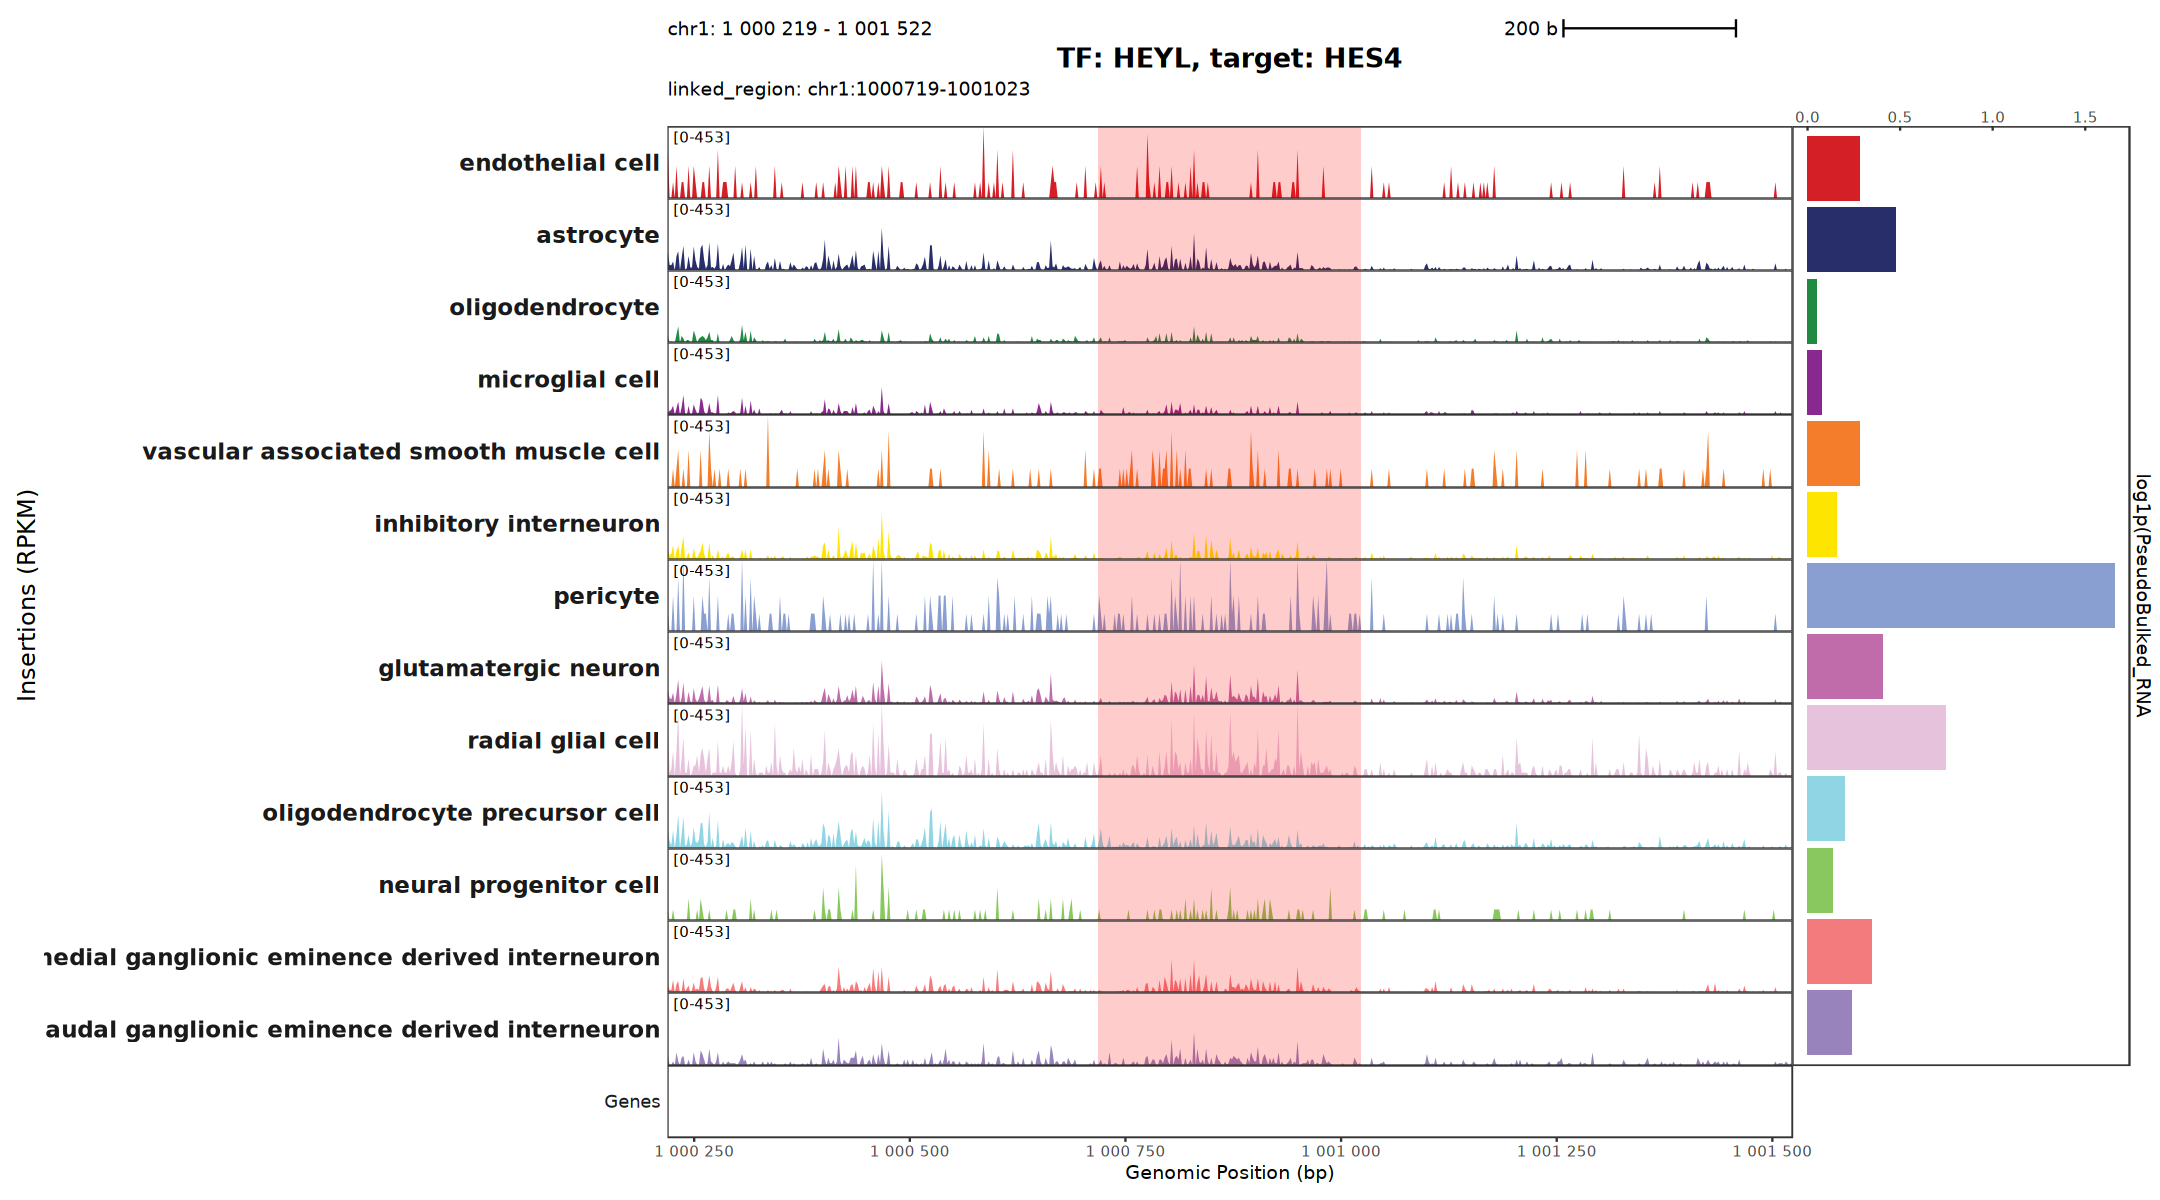

In [373]:
# zoomed-in view of exact region of Tn5 insertions is highlighted:

plot_detailed_genome_coverage_w_BULKED_EXPRESSION(
                               highlight_buffer = 0, # it means we do not extend the shaded (highlighted) area.
                               total_reads_per_cell = read_counts,
                               tf_name = "HEYL", 
                               target_name = "HES4",
                               my_region = "chr1:1000719-1001023",
                               bulked_rna_data = mat_rna_norm_pseudobulk,
                               bins_value = 500, 
                               extend.bp = 500, # extend more
                               genes_info = genes_info,
                               transcripts_info = transcripts_info,
                               fragments = subsetted_fragments,  
                               cell_types = metadata$cell_type)

In [374]:
# Zhu_et_al_w_JOINT_eGRNs  <-  
#             readRDS(here::here('r_objects', 'Zhu_et_al_w_JOINT_PANDO_eGRNs_p_adjusted.RDS'))

In [375]:
Zhu_et_al_w_JOINT_eGRNs

An object of class "GRNData"
Slot "grn":
A RegulatoryNetwork object based on 1014 transcription factors

1 inferred network: glm_network

Slot "data":
An object of class Seurat 
364381 features across 45549 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony


In [376]:
####### load the R environment with the necessary packages such as Epiregulon:

my_epiregulon_lib <- "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [377]:
.libPaths(new = my_epiregulon_lib, include.site = FALSE)

In [378]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [379]:
Zhu_et_al_w_JOINT_eGRNs

An object of class "GRNData"
Slot "grn":
A RegulatoryNetwork object based on 1014 transcription factors

1 inferred network: glm_network

Slot "data":
An object of class Seurat 
364381 features across 45549 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony


In [380]:
Zhu_et_al_w_JOINT_eGRNs %>% coef() %>% dplyr::arrange(desc(estimate)) %>% head()

tf   target  region                   term                          estimate
1 TAL1 RBFOX1  chr16-6066573-6066807    TAL1:chr16_6066573_6066807    5.209622
2 KLF4 PLEKHG1 chr6-150764546-150764643 KLF4:chr6_150764546_150764643 4.042818
3 PGR  MECOM   chr3-168591824-168591878 PGR:chr3_168591824_168591878  3.924652
4 TBX3 COBLL1  chr2-164302853-164303185 TBX3:chr2_164302853_164303185 3.891053
5 TAL1 RBFOX1  chr16-6059694-6059971    TAL1:chr16_6059694_6059971    3.445083
6 KLF4 DLG2    chr11-83681500-83681831  KLF4:chr11_83681500_83681831  3.260805
  std_err   statistic pval         padj         corr       old_padj    
1 3.3116269 1.573131  1.156960e-01 2.928388e-01 -0.1051221 3.084840e-01
2 1.0507058 3.847716  1.193882e-04 1.151286e-03  0.2335739 1.244262e-03
3 0.4222835 9.293879  1.551780e-20 1.446767e-18  0.1695230 1.017773e-18
4 1.2526602 3.106232  1.896048e-03 1.228332e-02  0.4035445 1.231379e-02
5 1.9158507 1.798200  7.215245e-02 2.113735e-01 -0.1051221 2.238727e-01
6 3.8212796 0.853328  3.934821e-01 6.283339e-01 -0.1159916 6.522966e-01

In [381]:
Zhu_et_al_w_JOINT_eGRNs %>% 
coef() %>% 
dplyr::arrange(desc(estimate)) %>% 
dplyr::filter(padj < 0.05) %>% head()

tf    target   region                   term                         
1 KLF4  PLEKHG1  chr6-150764546-150764643 KLF4:chr6_150764546_150764643
2 PGR   MECOM    chr3-168591824-168591878 PGR:chr3_168591824_168591878 
3 TBX3  COBLL1   chr2-164302853-164303185 TBX3:chr2_164302853_164303185
4 TBX3  SLC38A11 chr2-164302853-164303185 TBX3:chr2_164302853_164303185
5 TAL1  TGFBR2   chr3-31196958-31197259   TAL1:chr3_31196958_31197259  
6 SOX17 PMAIP1   chr18-59823380-59823547  chr18_59823380_59823547:SOX17
  estimate std_err   statistic pval          padj          corr     
1 4.042818 1.0507058  3.847716  1.193882e-04  1.151286e-03 0.2335739
2 3.924652 0.4222835  9.293879  1.551780e-20  1.446767e-18 0.1695230
3 3.891053 1.2526602  3.106232  1.896048e-03  1.228332e-02 0.4035445
4 3.211764 0.7540710  4.259234  2.055411e-05  2.440791e-04 0.2533031
5 3.066311 0.7325268  4.185936  2.845333e-05  3.260292e-04 0.2228715
6 2.626929 0.1154657 22.750736 6.125280e-114 1.823093e-110 0.1043876
  old_padj     
1  1.244262e-03
2  1.017773e-18
3  1.231379e-02
4  2.414278e-04
5  2.506345e-04
6 9.198017e-112

[1] "Expanded region: chr3 168591324 168592378"
[1] "Original region: chr3 168591824 168591878"


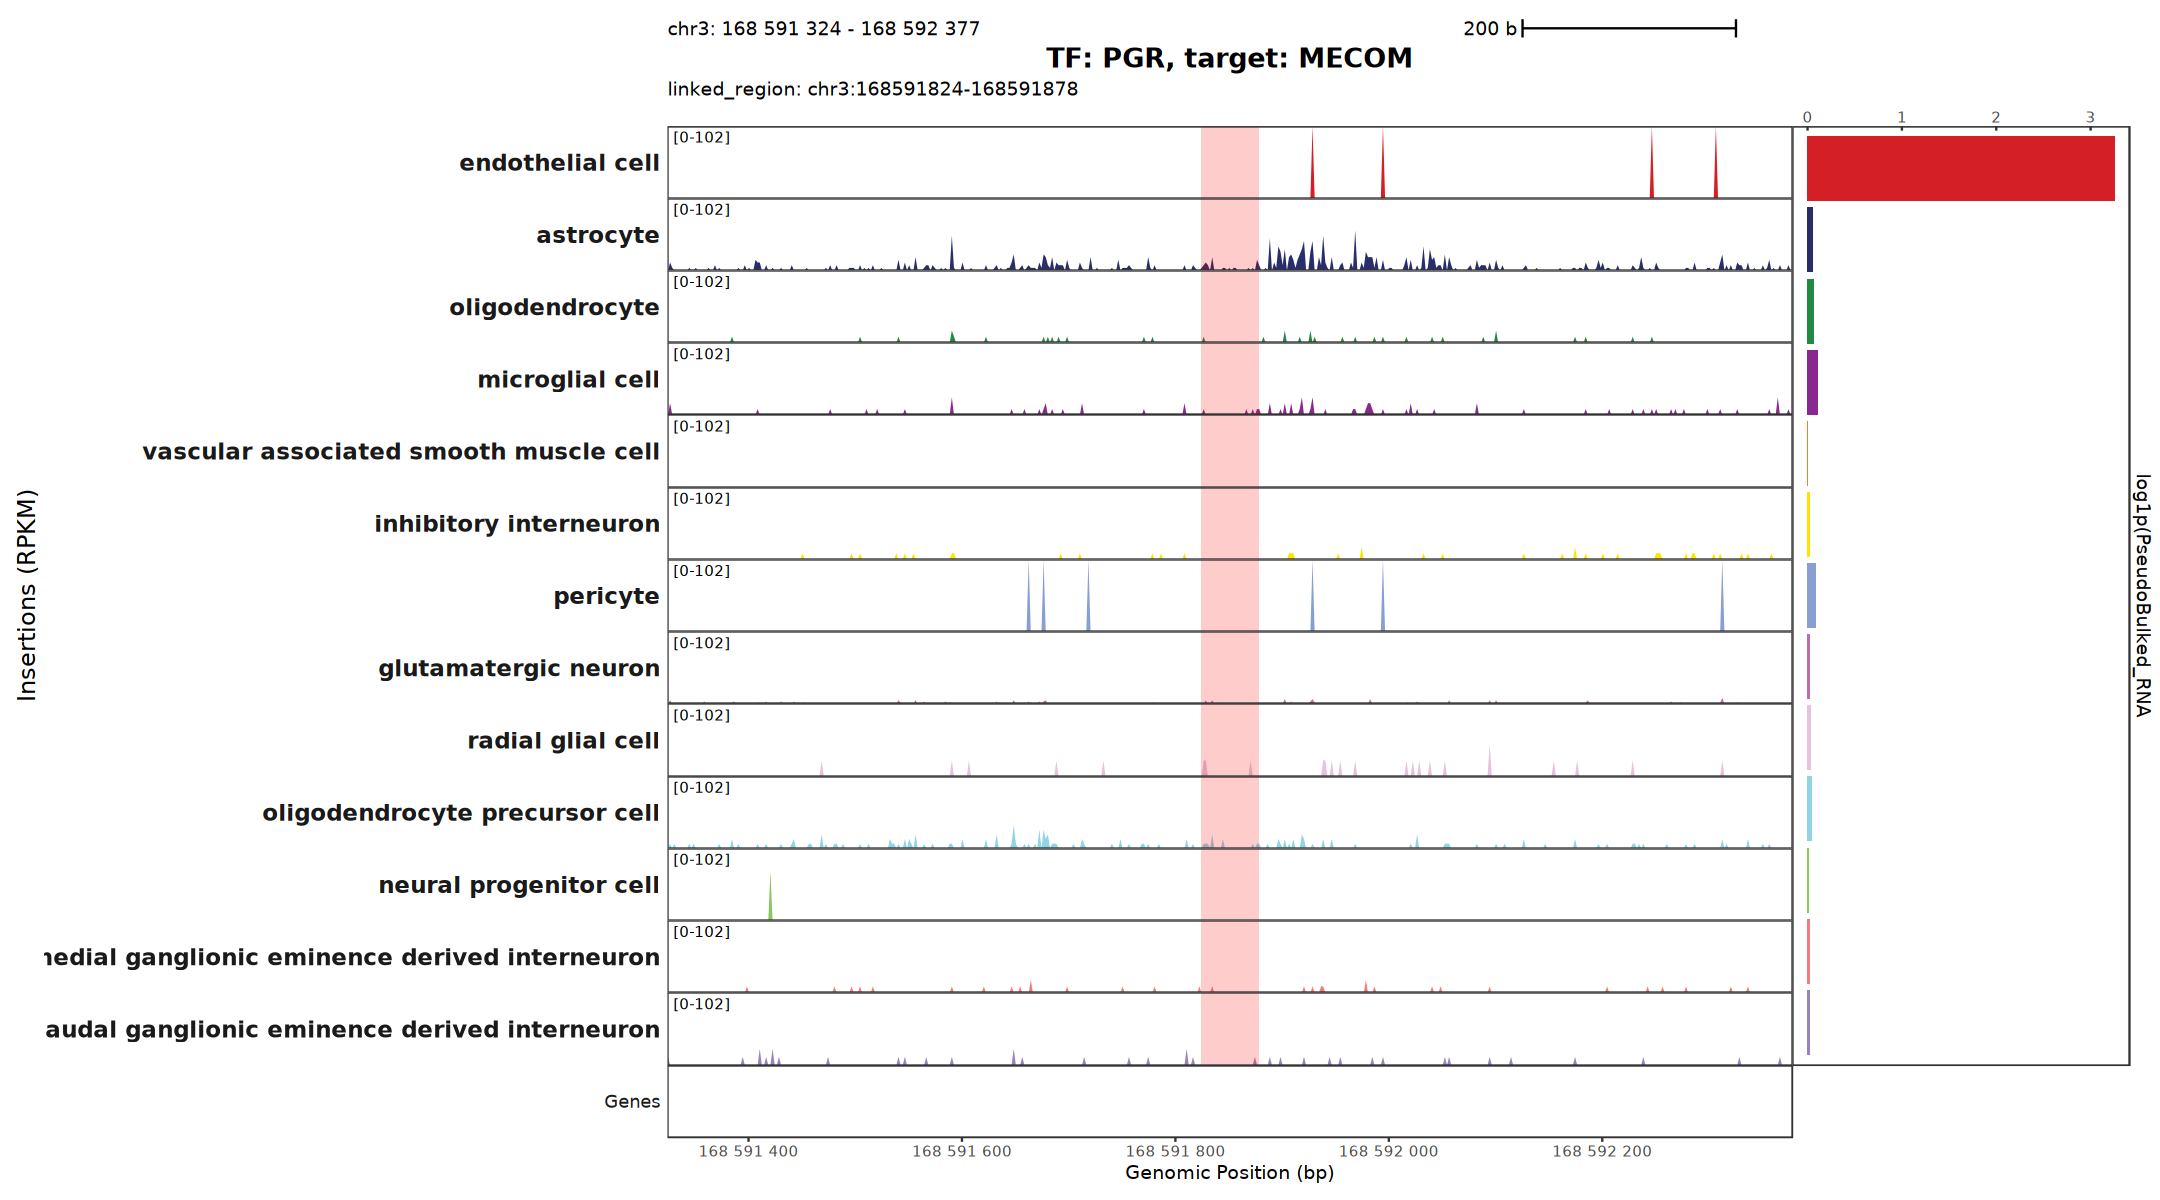

In [382]:
# zoomed-in view of exact region of Tn5 insertions is highlighted:

plot_detailed_genome_coverage_w_BULKED_EXPRESSION(
                               highlight_buffer = 0, # it means we do not extend the shaded (highlighted) area.
                               total_reads_per_cell = read_counts,
                               tf_name = "PGR", 
                               target_name = "MECOM",
                               my_region = "chr3:168591824-168591878",
                               bulked_rna_data = mat_rna_norm_pseudobulk,
                               bins_value = 500, 
                               extend.bp = 500, # extend more
                               genes_info = genes_info,
                               transcripts_info = transcripts_info,
                               fragments = subsetted_fragments,  
                               cell_types = metadata$cell_type)

In [383]:
mat_rna_norm_pseudobulk['MECOM',, drop = FALSE]

endothelial cell astrocyte  oligodendrocyte microglial cell
MECOM 3.250904         0.05056526 0.06559512      0.1041079      
      vascular associated smooth muscle cell inhibitory interneuron pericyte  
MECOM 0                                      0.01927699             0.08359972
      glutamatergic neuron radial glial cell oligodendrocyte precursor cell
MECOM 0.0165541            0.02748584        0.04651045                    
      neural progenitor cell medial ganglionic eminence derived interneuron
MECOM 0.01304453             0.02077012                                    
      caudal ganglionic eminence derived interneuron
MECOM 0.02063118

Next, I will identify the Pando TF-regulons that are enriched across cell types\
and will visualize important TF-target connections using genome coverage plots.

I also need to run Epiregulon workflow to identify TF-regulons using Zhu et al data.

In [353]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] Pando_1.1.1                       BSgenome.Hsapiens.UCSC.hg38_1.4.5
 [3] BSgenome_1.74.0                   rtracklayer_1.66.0               
 [5] BiocIO_1.16.0                     ggplot2_3.5.1                    
 [7] chromVARmotifs_0.2.0              motifmatchr_1